
## Time Series GPTs

* Time series data 



## Libraries


In [2]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures


In [4]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [5]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [6]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [7]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [8]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1378  0.109500    0.004444  0.762500                4.204430   
1379 -0.116500    0.008900  0.646000                4.208539   
1380  0.008667   -0.037618  0.654667                4.212648   
1381 -0.063000   -0.014340  0.591667                4.217784   
1382  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1378          2169.361647            9297.484543   185.046491   
1379          2169.079601            9312.779010   185.053796   
1380          2168.797556            9303.753420   185.007919   
1381          2168.444999            9333.448101   184.942435   
1382          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
0                       0.0           0.0           0.354        0.16   
1                       0.0           0.0           0.313        0.83   
2                       0.0           0.0           0.360        0.10   
3                       0.0           0.0           0.319        0.34   
4                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1378                    0.0           0.0           0.343        0.30   
1379                    0.0           0.0           0.324        0.30   
1380                    0.0           0.0           0.325        0.16   
1381                    0.0           0.0           0.335        0.26   
1382                    0.0           0.0           0.328        1.08   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
0               21.080431             18.313322             4.131228   
1               20.996415             18.311768             4.133911   
2               20.749627             18.341701             4.137632   
3               20.609259             18.644476             4.142824   
4               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1378            21.039583             18.308225             4.129485   
1379            21.043999             18.308776             4.129674   
1380            21.048415             18.309327             4.129862   
1381            21.053935             18.310016             4.130097   
1382            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
0               54.940123    171.769513    182.533770    148.126483   
1               55.072779    170.595469    183.725050    148.161842   
2               55.375043    167.017421    195.812061    147.562523   
3               55.341884    154.214917    188.028883    147.807509   
4               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1378            55.162782    167.619915    185.900341    148.103530   
1379            55.162767    164.706552    182.408576    148.106012   
1380            55.140373    166.903493    181.684649    148.108493   
1381


## Training Functions


In [9]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        ## loss =  (0.1)*loss_SI + Curve_SIMs[0] + Curve_SIMs[1] + Curve_SIMs[2] + Curve_SIMs[3]  
        
        loss =  (0)*loss_SI + Curve_SIMs[2]  
       
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        history['loss_SIM2'].append( Curve_SIMs[2] )
        history['loss_SIM3'].append( Curve_SIMs[3] )
        history['loss_SIM4'].append( Curve_SIMs[4] )
        history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [10]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  19.87806510925293
seq length of pred =  30
500 train loss =  21.260358810424805
seq length of pred =  30
1000 train loss =  20.788864135742188
seq length of pred =  30
1500 train loss =  21.714229583740234
seq length of pred =  30
2000 train loss =  19.925596237182617
seq length of pred =  30
2500 train loss =  22.21570587158203
seq length of pred =  30


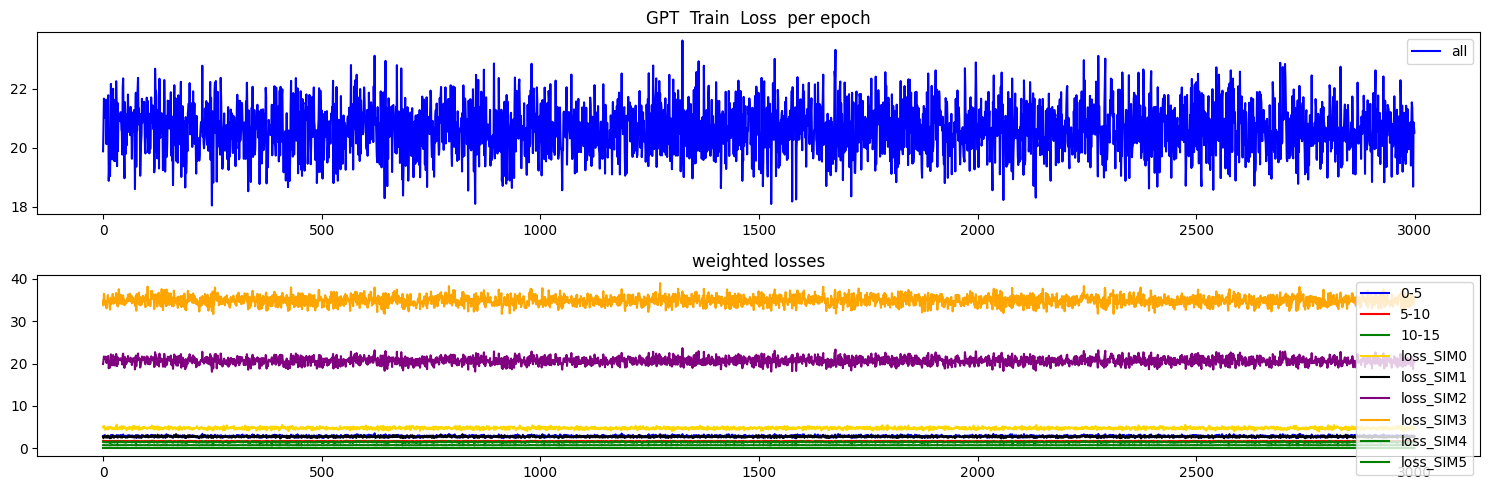

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.052723754197359085
Test MSE Loss - SI only 0-5:  0.10160420835018158
Test MSE Loss - SI only 5-10:  0.0074538723565638065
Test MSE Loss - SI only 10-15:  0.044025734066963196
mae, mse, rmse, mape, mspe, rse, corr
(0.17963284, 0.052723758, 0.22961655, 2.8919187, 20.62809, 1.6484036)
Testing R**2 - SI only:  -1.7172346307047475
Testing R**2 - SI only:  -1.7172346307047475
Testing R**2 - All features:  0.9847991473416664
Testing R**2 - (f2) - SI full:  -1.03445517027206


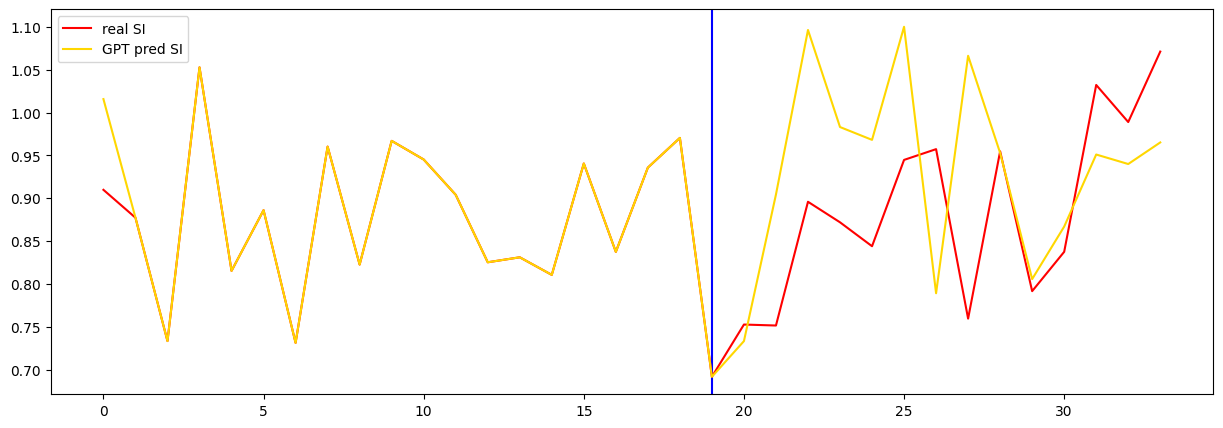

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.544927597045898
seq length of pred =  30
500 train loss =  14.224553108215332
seq length of pred =  30
1000 train loss =  15.22696590423584
seq length of pred =  30
1500 train loss =  15.298608779907227
seq length of pred =  30
2000 train loss =  15.446457862854004
seq length of pred =  30
2500 train loss =  14.30185317993164
seq length of pred =  30


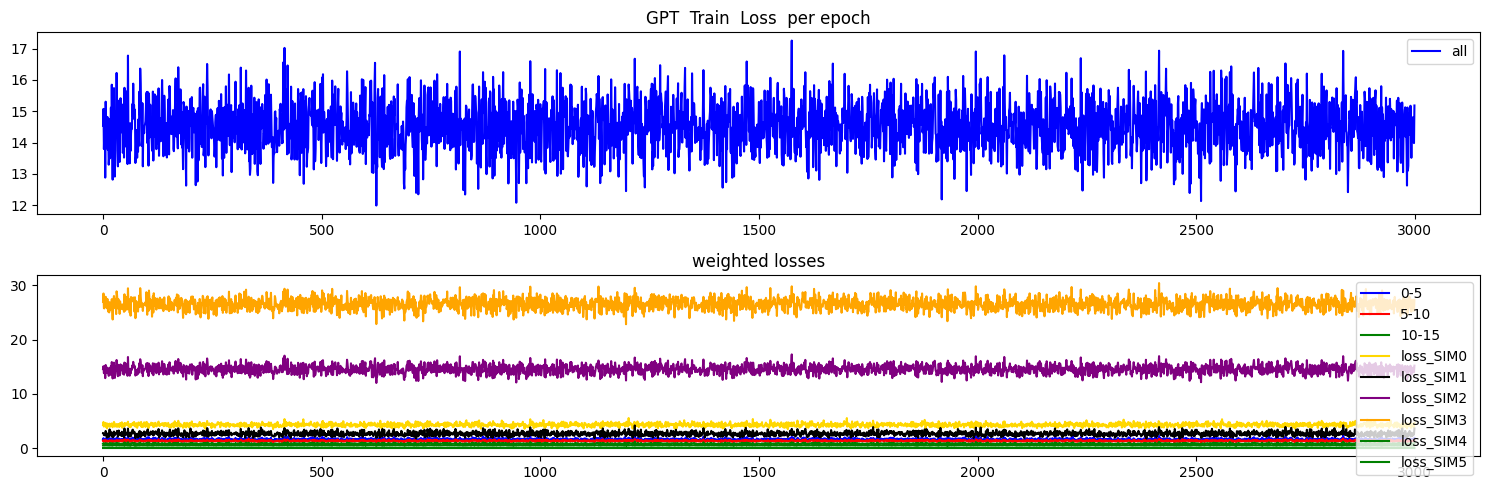

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.058492787182331085
Test MSE Loss - SI only 0-5:  0.10160420835018158
Test MSE Loss - SI only 5-10:  0.0074538723565638065
Test MSE Loss - SI only 10-15:  0.044025734066963196
mae, mse, rmse, mape, mspe, rse, corr
(0.19538148, 0.058492787, 0.24185282, 3.964534, 79.45553, 1.7362471)
Testing R**2 - SI only:  -2.0145544057970044
Testing R**2 - SI only:  -2.0145544057970044
Testing R**2 - All features:  0.9844749004750681
Testing R**2 - (f2) - SI full:  -2.4598025549666733


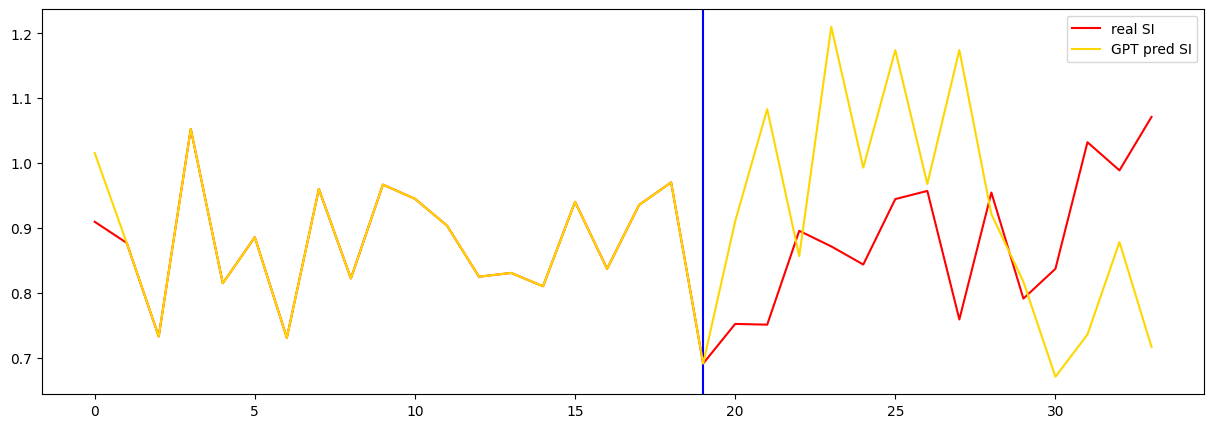

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.822675704956055
seq length of pred =  30
500 train loss =  15.53396224975586
seq length of pred =  30
1000 train loss =  15.084150314331055
seq length of pred =  30
1500 train loss =  14.552892684936523
seq length of pred =  30
2000 train loss =  15.723151206970215
seq length of pred =  30
2500 train loss =  14.645554542541504
seq length of pred =  30


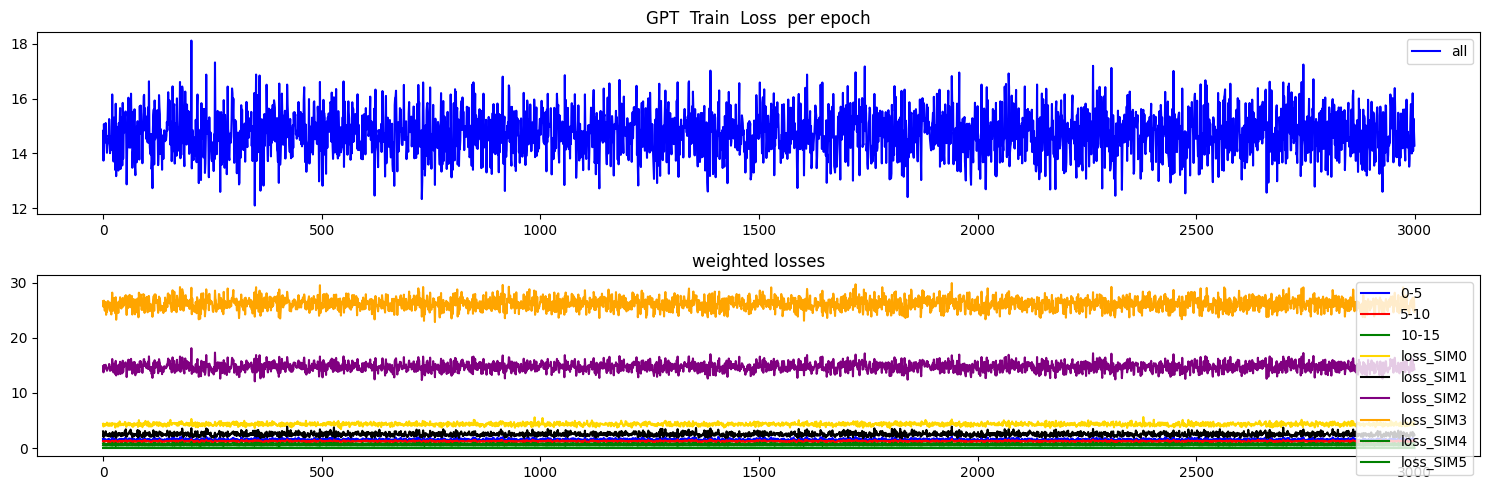

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.055679284036159515
Test MSE Loss - SI only 0-5:  0.10160422325134277
Test MSE Loss - SI only 5-10:  0.0074538723565638065
Test MSE Loss - SI only 10-15:  0.044025734066963196
mae, mse, rmse, mape, mspe, rse, corr
(0.18528974, 0.055679284, 0.23596458, 4.0909257, 87.74606, 1.6939758)
Testing R**2 - SI only:  -1.8695539910249117
Testing R**2 - SI only:  -1.8695539910249117
Testing R**2 - All features:  0.9906951252830407
Testing R**2 - (f2) - SI full:  -1.4997806484586764


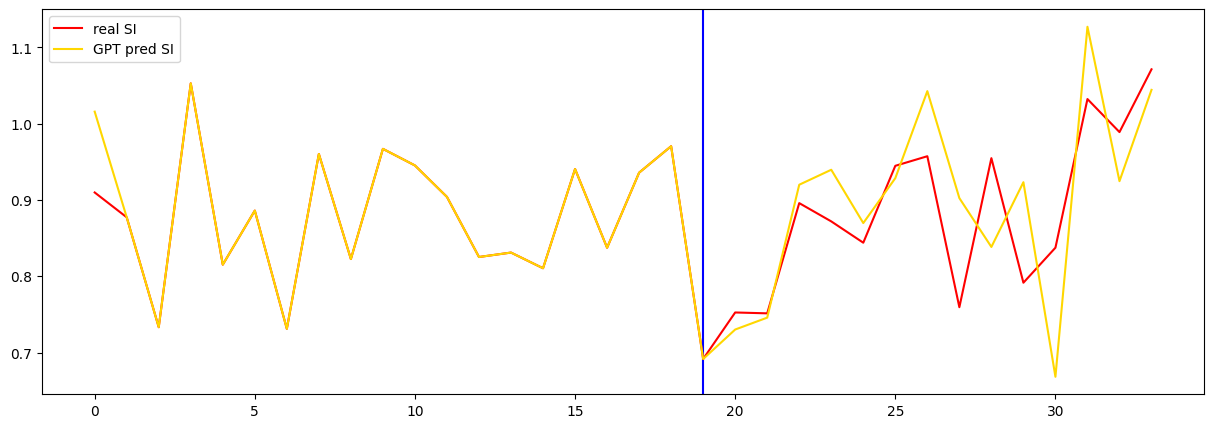

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  12.096875190734863
seq length of pred =  30
500 train loss =  12.867169380187988
seq length of pred =  30
1000 train loss =  14.016363143920898
seq length of pred =  30
1500 train loss =  14.454451560974121
seq length of pred =  30
2000 train loss =  14.59788703918457
seq length of pred =  30
2500 train loss =  12.533231735229492
seq length of pred =  30


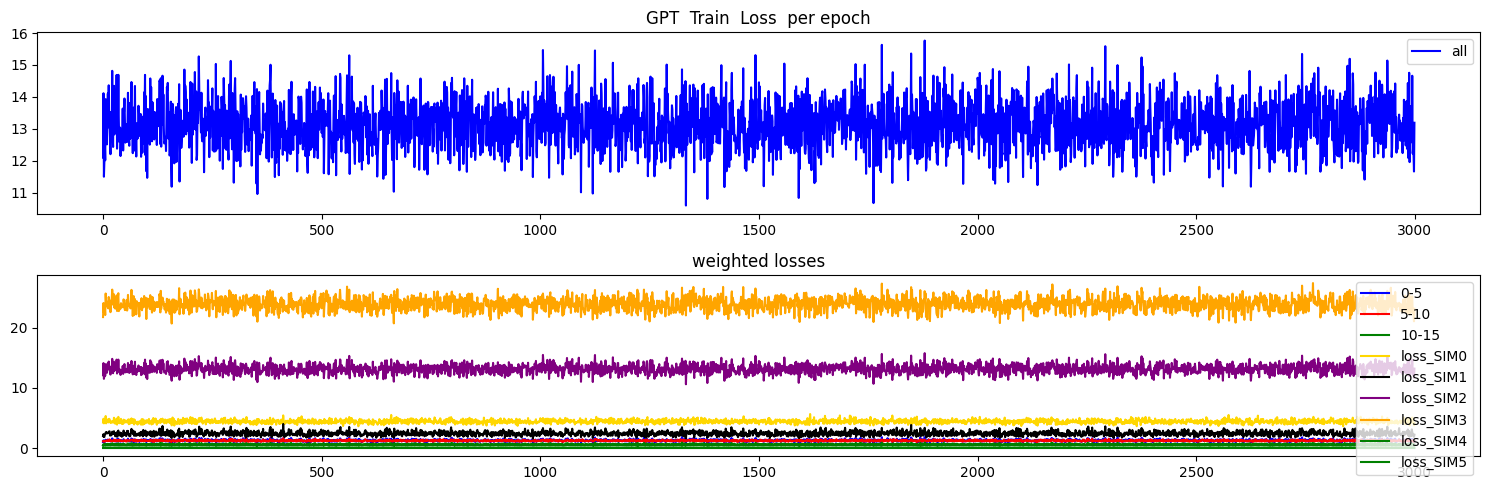

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.052313182502985
Test MSE Loss - SI only 0-5:  0.10160422325134277
Test MSE Loss - SI only 5-10:  0.0074538723565638065
Test MSE Loss - SI only 10-15:  0.044025734066963196
mae, mse, rmse, mape, mspe, rse, corr
(0.17438616, 0.052313183, 0.22872075, 3.8635662, 96.370445, 1.6419728)
Testing R**2 - SI only:  -1.6960747099119455
Testing R**2 - SI only:  -1.6960747099119455
Testing R**2 - All features:  0.9656802285207611
Testing R**2 - (f2) - SI full:  -1.9091522869068789


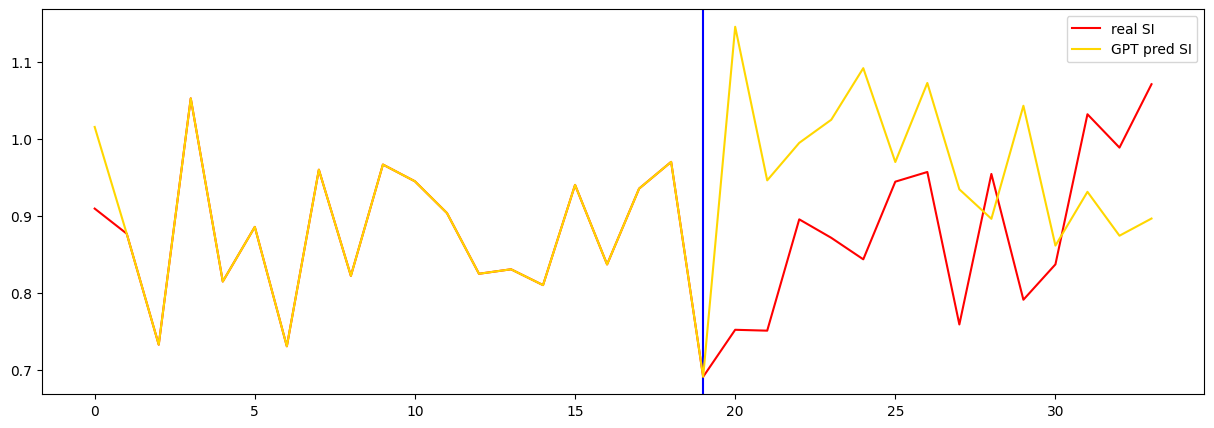

In [14]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 2


In [15]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  17.124914169311523
seq length of pred =  30
500 train loss =  15.863136291503906
seq length of pred =  30
1000 train loss =  16.055217742919922
seq length of pred =  30
1500 train loss =  17.041208267211914
seq length of pred =  30
2000 train loss =  15.67626667022705
seq length of pred =  30
2500 train loss =  15.706033706665039
seq length of pred =  30


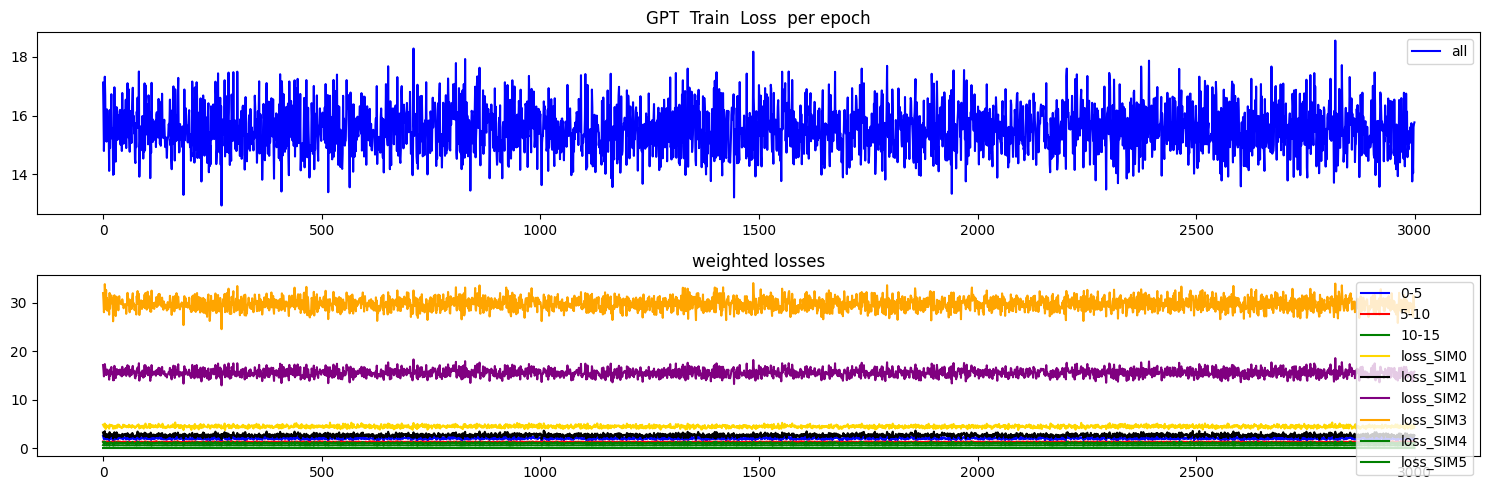

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04709269478917122
Test MSE Loss - SI only 0-5:  0.03467342257499695
Test MSE Loss - SI only 5-10:  0.03627777844667435
Test MSE Loss - SI only 10-15:  0.07530568540096283
mae, mse, rmse, mape, mspe, rse, corr
(0.1801119, 0.0470927, 0.21700852, 2.0637205, 7.7951465, 1.3884538)
Testing R**2 - SI only:  -0.9278041334905558
Testing R**2 - SI only:  -0.9278041334905558
Testing R**2 - All features:  0.9549939693140816
Testing R**2 - (f2) - SI full:  0.09252677902595019


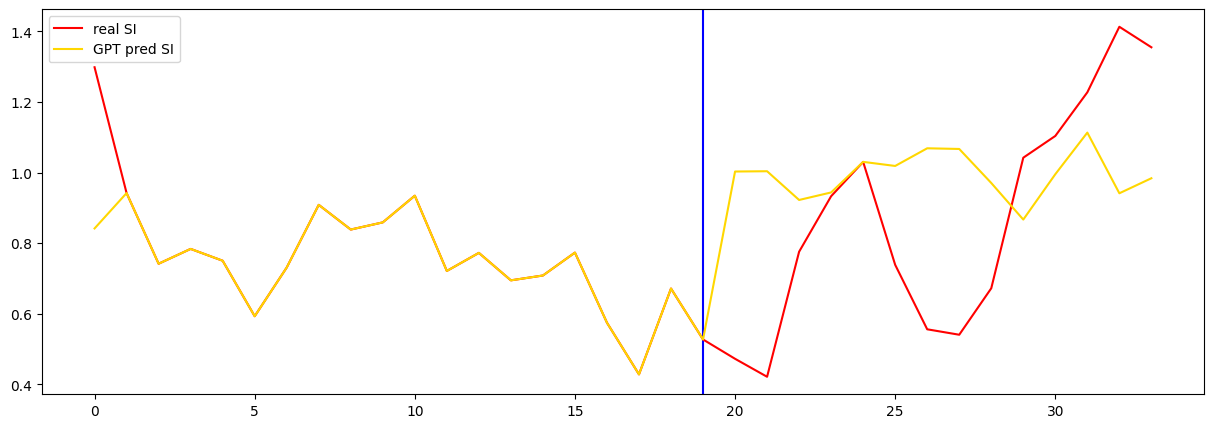

In [16]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  12.335885047912598
seq length of pred =  30
500 train loss =  13.866297721862793
seq length of pred =  30
1000 train loss =  11.310808181762695
seq length of pred =  30
1500 train loss =  12.328201293945312
seq length of pred =  30
2000 train loss =  13.643375396728516
seq length of pred =  30
2500 train loss =  12.999794006347656
seq length of pred =  30


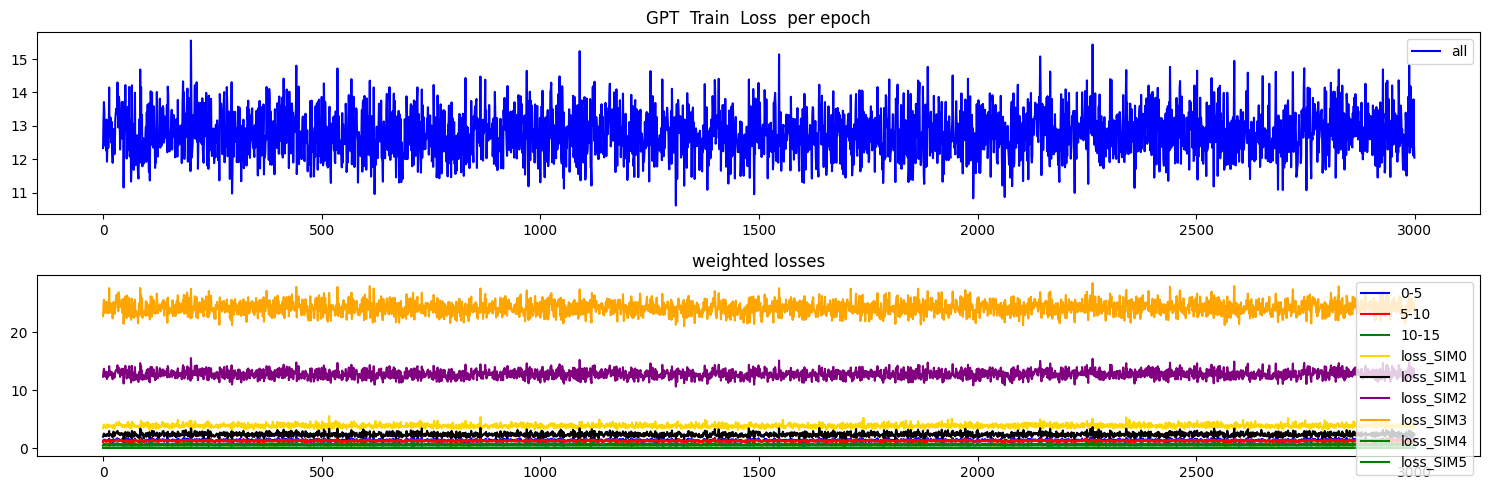

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.046380024403333664
Test MSE Loss - SI only 0-5:  0.03467342257499695
Test MSE Loss - SI only 5-10:  0.03627777844667435
Test MSE Loss - SI only 10-15:  0.07530568540096283
mae, mse, rmse, mape, mspe, rse, corr
(0.17872545, 0.046380024, 0.21536022, 1.9600013, 6.555004, 1.3779078)
Testing R**2 - SI only:  -0.8986301260898493
Testing R**2 - SI only:  -0.8986301260898493
Testing R**2 - All features:  0.9203583029816094
Testing R**2 - (f2) - SI full:  0.16990903889086317


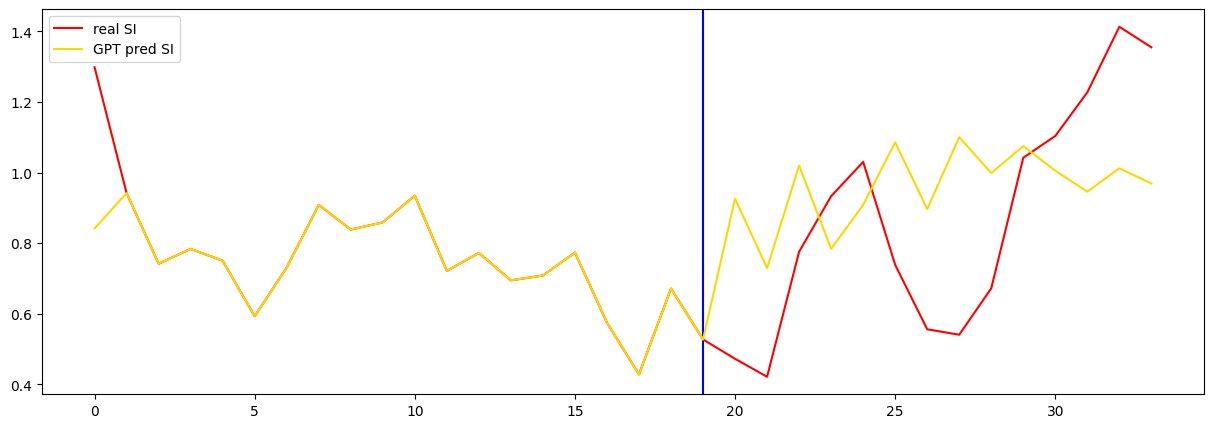

In [17]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  10.593037605285645
seq length of pred =  30
500 train loss =  11.155305862426758
seq length of pred =  30
1000 train loss =  10.878100395202637
seq length of pred =  30
1500 train loss =  11.592110633850098
seq length of pred =  30
2000 train loss =  12.091259002685547
seq length of pred =  30
2500 train loss =  9.858420372009277
seq length of pred =  30


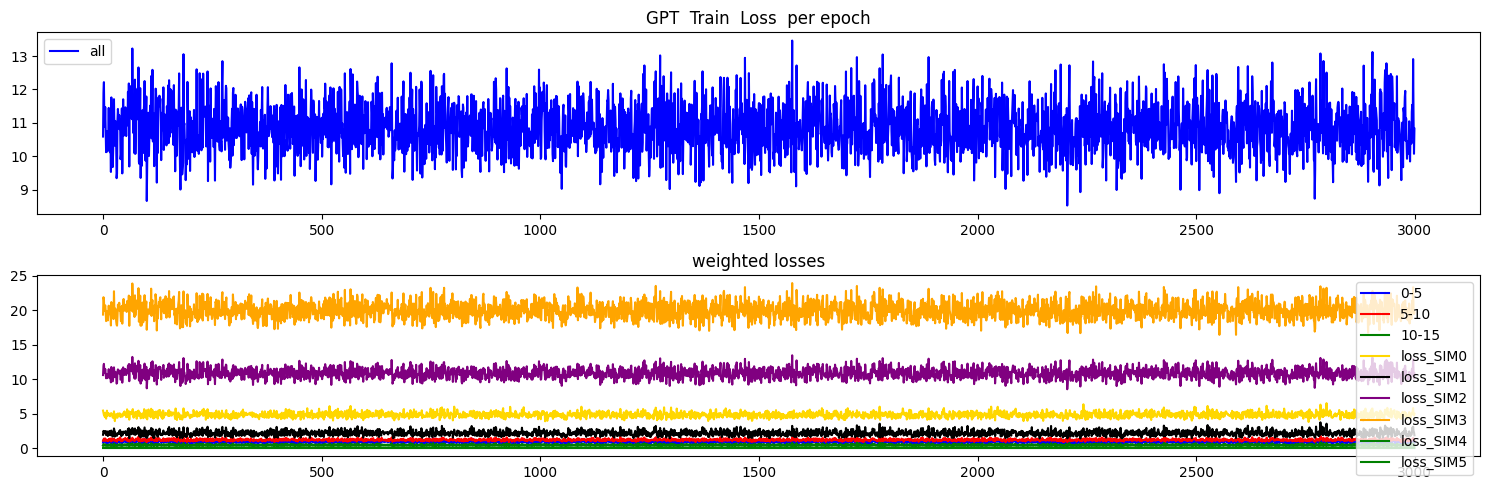

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0459713451564312
Test MSE Loss - SI only 0-5:  0.03467342257499695
Test MSE Loss - SI only 5-10:  0.03627777844667435
Test MSE Loss - SI only 10-15:  0.07530568540096283
mae, mse, rmse, mape, mspe, rse, corr
(0.17843693, 0.045971345, 0.21440929, 1.9970409, 6.698468, 1.3718237)
Testing R**2 - SI only:  -0.8819001521247813
Testing R**2 - SI only:  -0.8819001521247813
Testing R**2 - All features:  0.9400163445957922
Testing R**2 - (f2) - SI full:  0.12276969718211206


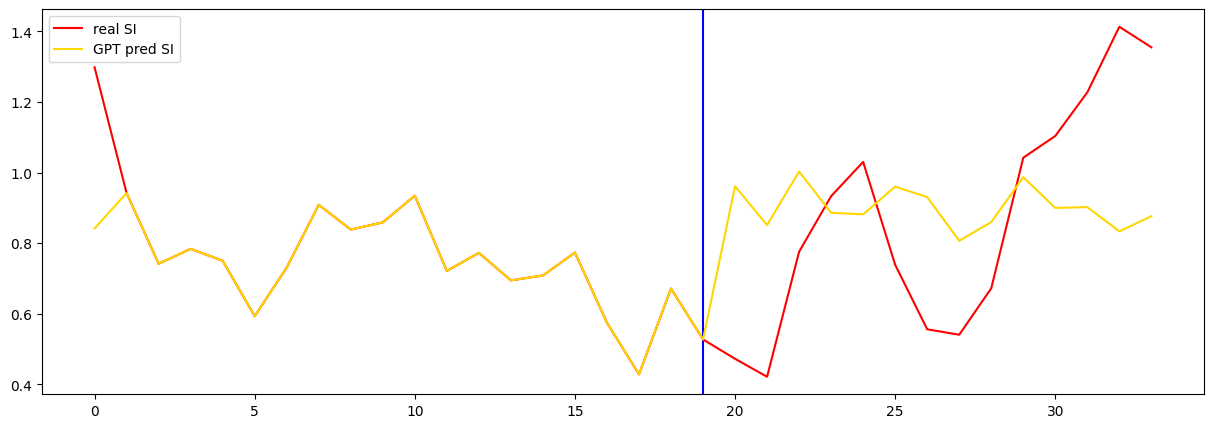

In [18]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  9.567397117614746
seq length of pred =  30
500 train loss =  8.846587181091309
seq length of pred =  30
1000 train loss =  9.75394058227539
seq length of pred =  30
1500 train loss =  10.361289978027344
seq length of pred =  30
2000 train loss =  9.033607482910156
seq length of pred =  30
2500 train loss =  9.678894996643066
seq length of pred =  30


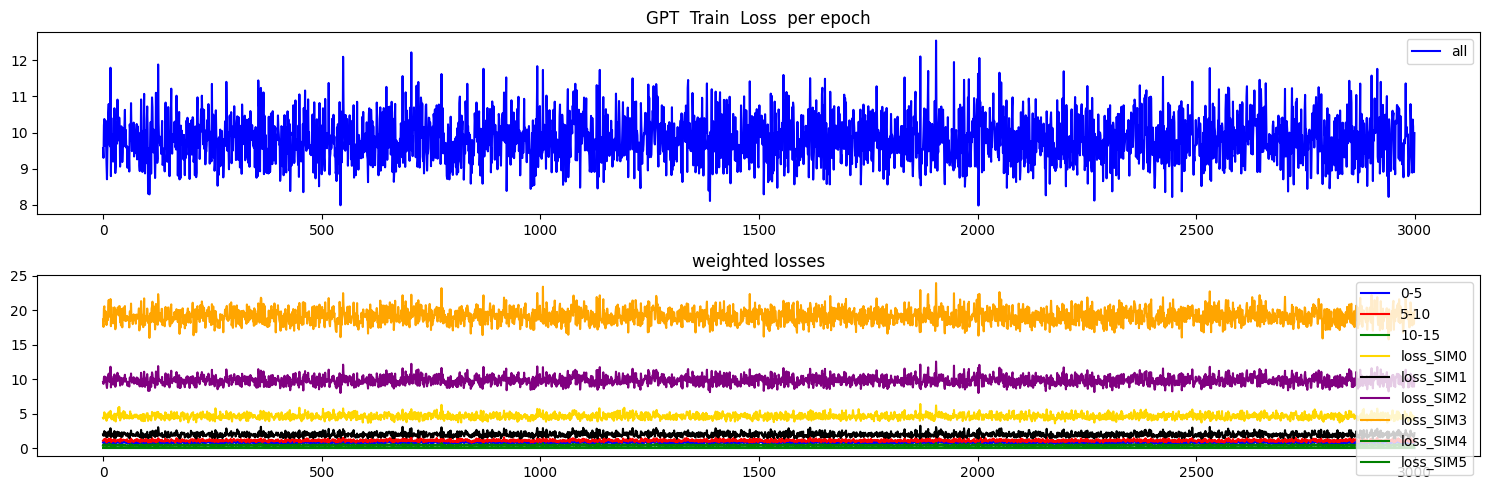

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.048142582178115845
Test MSE Loss - SI only 0-5:  0.03467342257499695
Test MSE Loss - SI only 5-10:  0.03627777472138405
Test MSE Loss - SI only 10-15:  0.07530568540096283
mae, mse, rmse, mape, mspe, rse, corr
(0.18285719, 0.048142575, 0.21941416, 1.9805204, 6.632293, 1.4038455)
Testing R**2 - SI only:  -0.9707826485646096
Testing R**2 - SI only:  -0.9707826485646096
Testing R**2 - All features:  0.9597732607073164
Testing R**2 - (f2) - SI full:  0.2944390020779907


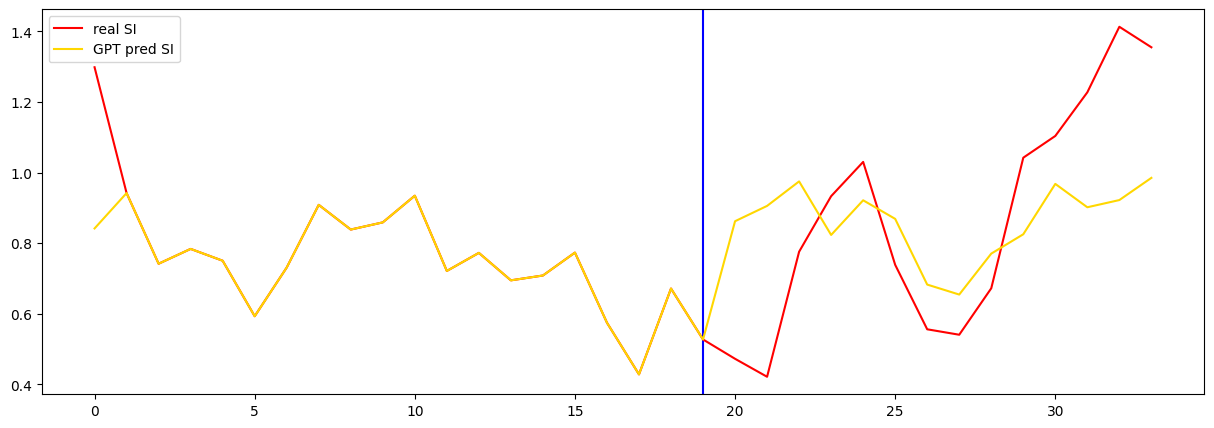

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 3


In [20]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  14.104991912841797
seq length of pred =  30
500 train loss =  13.420852661132812
seq length of pred =  30
1000 train loss =  13.826604843139648
seq length of pred =  30
1500 train loss =  13.235871315002441
seq length of pred =  30
2000 train loss =  15.439573287963867
seq length of pred =  30
2500 train loss =  14.0509672164917
seq length of pred =  30


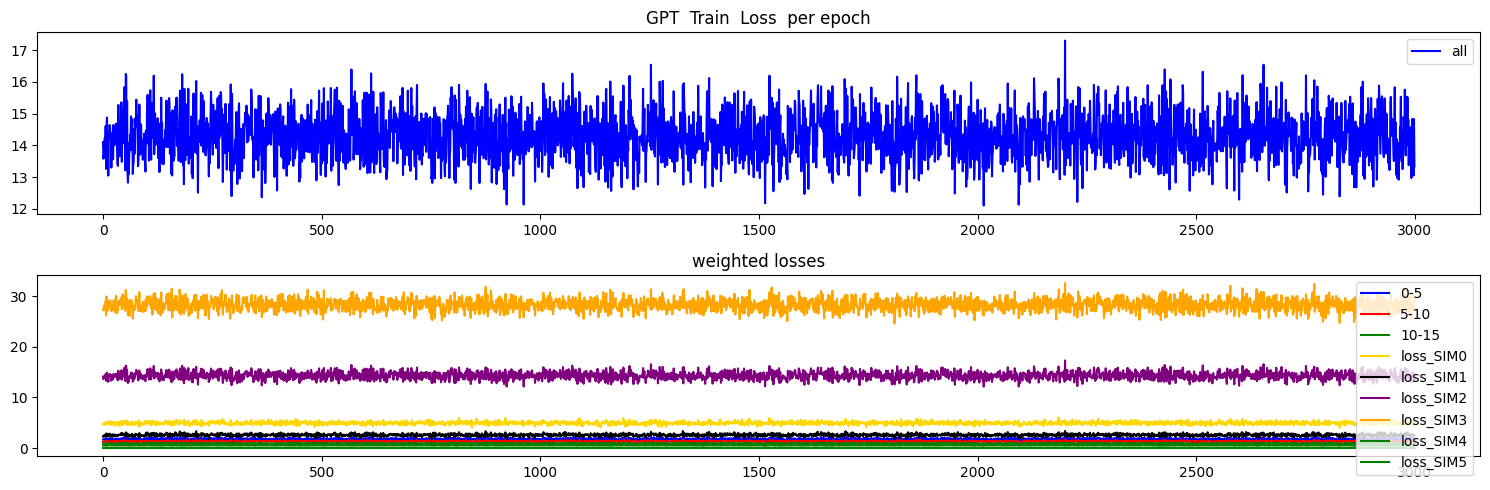

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.058205634355545044
Test MSE Loss - SI only 0-5:  0.04367061331868172
Test MSE Loss - SI only 5-10:  0.04676626995205879
Test MSE Loss - SI only 10-15:  0.11337659507989883
mae, mse, rmse, mape, mspe, rse, corr
(0.20056383, 0.058205634, 0.24125844, 4.9752026, 255.411, 1.4557866)
Testing R**2 - SI only:  -1.1193144414568597
Testing R**2 - SI only:  -1.1193144414568597
Testing R**2 - All features:  0.9845164317212297
Testing R**2 - (f2) - SI full:  -0.1869746305928981


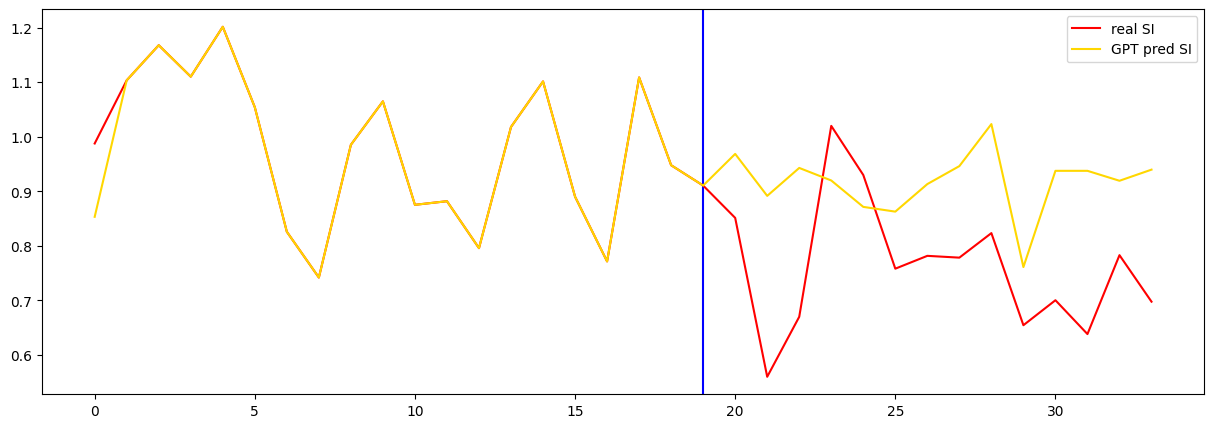

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  15.22057819366455
seq length of pred =  30
500 train loss =  15.609031677246094
seq length of pred =  30
1000 train loss =  14.379332542419434
seq length of pred =  30
1500 train loss =  14.058412551879883
seq length of pred =  30
2000 train loss =  15.330240249633789
seq length of pred =  30
2500 train loss =  14.40125846862793
seq length of pred =  30


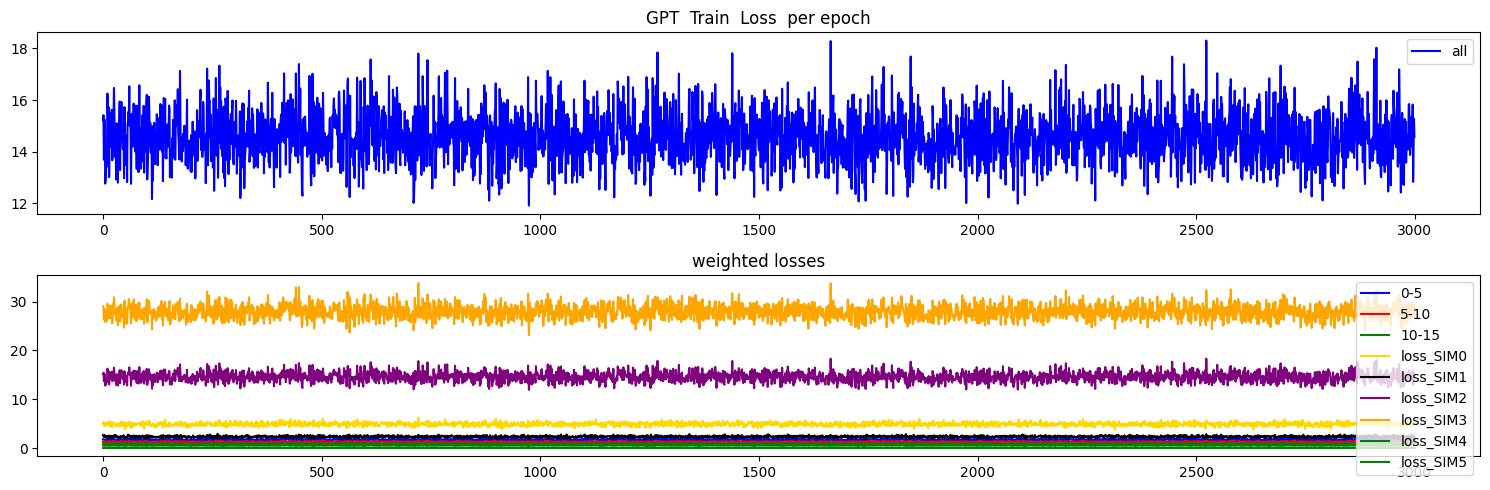

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.056920092552900314
Test MSE Loss - SI only 0-5:  0.04367060586810112
Test MSE Loss - SI only 5-10:  0.046766262501478195
Test MSE Loss - SI only 10-15:  0.11337659507989883
mae, mse, rmse, mape, mspe, rse, corr
(0.20219307, 0.05692009, 0.23857932, 3.7262185, 81.39496, 1.4396204)
Testing R**2 - SI only:  -1.07250708766967
Testing R**2 - SI only:  -1.07250708766967
Testing R**2 - All features:  0.9702090668947453
Testing R**2 - (f2) - SI full:  0.14372110167716512


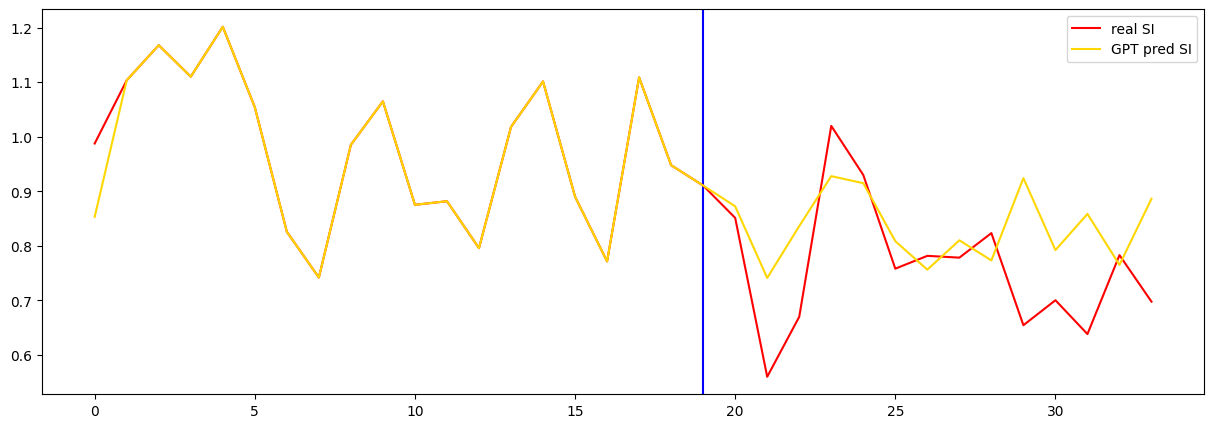

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  13.88477611541748
seq length of pred =  30
500 train loss =  13.525486946105957
seq length of pred =  30
1000 train loss =  13.716821670532227
seq length of pred =  30
1500 train loss =  14.797112464904785
seq length of pred =  30
2000 train loss =  15.92880630493164
seq length of pred =  30
2500 train loss =  13.321836471557617
seq length of pred =  30


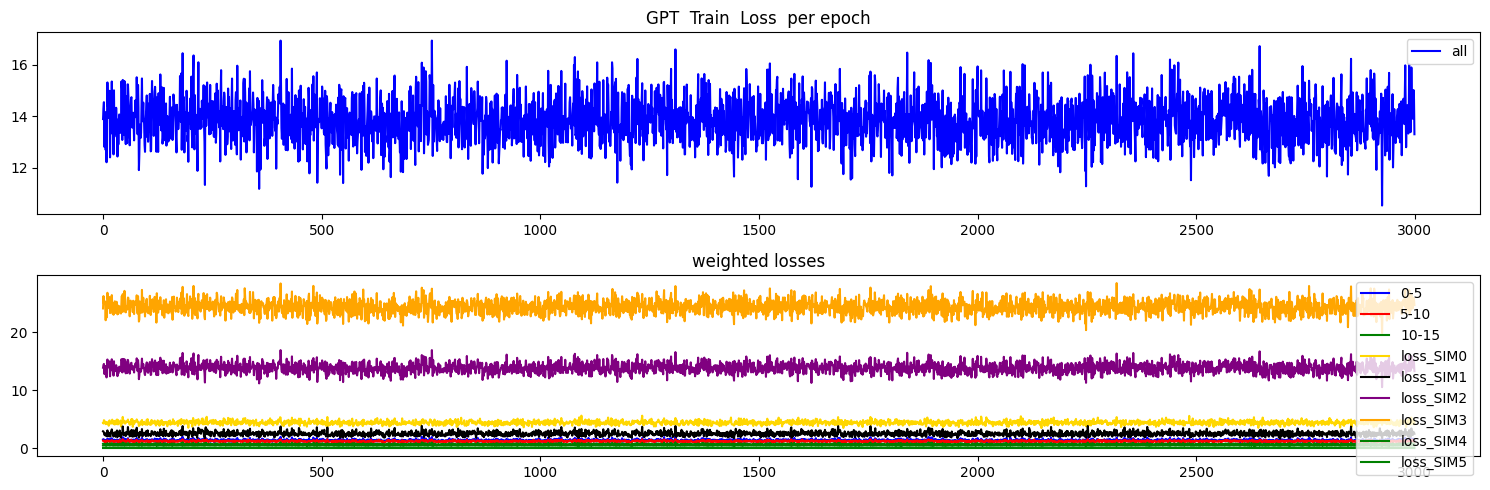

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06270989030599594
Test MSE Loss - SI only 0-5:  0.04367060586810112
Test MSE Loss - SI only 5-10:  0.04676626995205879
Test MSE Loss - SI only 10-15:  0.11337659507989883
mae, mse, rmse, mape, mspe, rse, corr
(0.20976083, 0.06270989, 0.25041944, 2.5660546, 29.827251, 1.5110652)
Testing R**2 - SI only:  -1.2833182438674
Testing R**2 - SI only:  -1.2833182438674
Testing R**2 - All features:  0.9772661784258962
Testing R**2 - (f2) - SI full:  0.21659119874605248


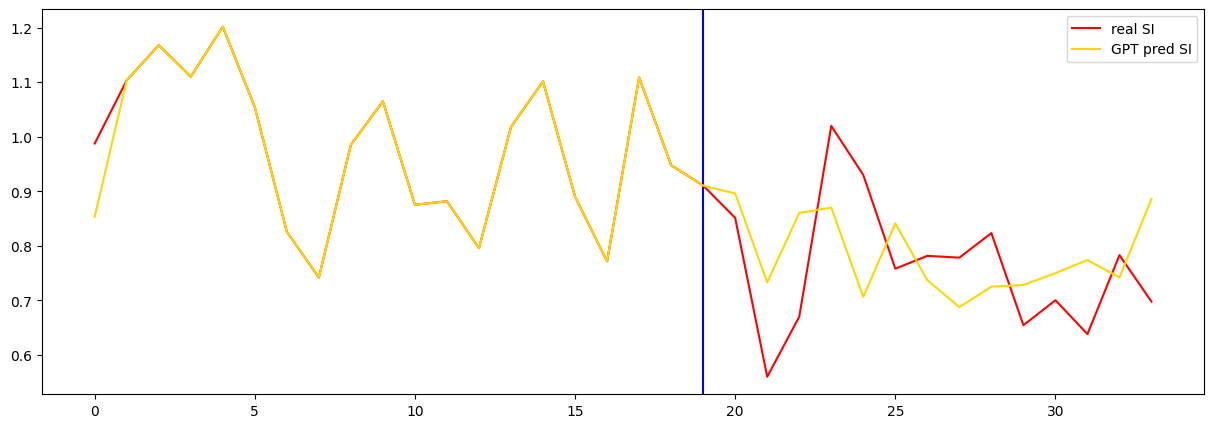

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.064210891723633
seq length of pred =  30
500 train loss =  14.030501365661621
seq length of pred =  30
1000 train loss =  15.374907493591309
seq length of pred =  30
1500 train loss =  14.291345596313477
seq length of pred =  30
2000 train loss =  13.378907203674316
seq length of pred =  30
2500 train loss =  13.653020858764648
seq length of pred =  30


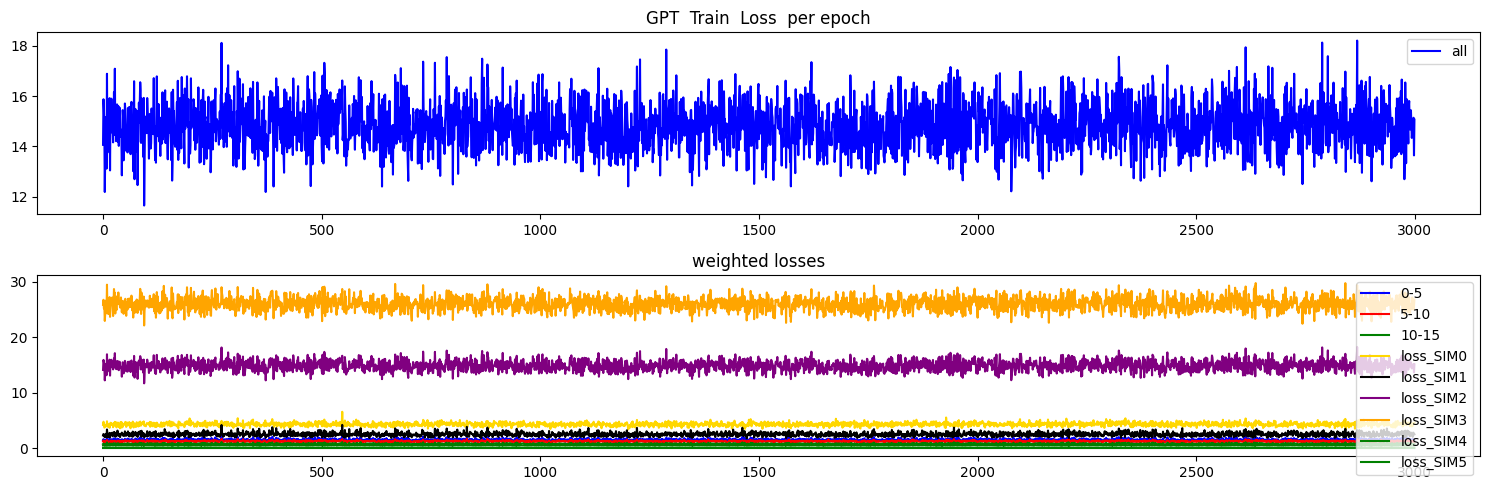

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0559878796339035
Test MSE Loss - SI only 0-5:  0.04367060586810112
Test MSE Loss - SI only 5-10:  0.046766262501478195
Test MSE Loss - SI only 10-15:  0.11337659507989883
mae, mse, rmse, mape, mspe, rse, corr
(0.1962558, 0.055987876, 0.23661758, 3.3646677, 67.2267, 1.427783)
Testing R**2 - SI only:  -1.0385643155035202
Testing R**2 - SI only:  -1.0385643155035202
Testing R**2 - All features:  0.9817590020704259
Testing R**2 - (f2) - SI full:  0.014788181021502034


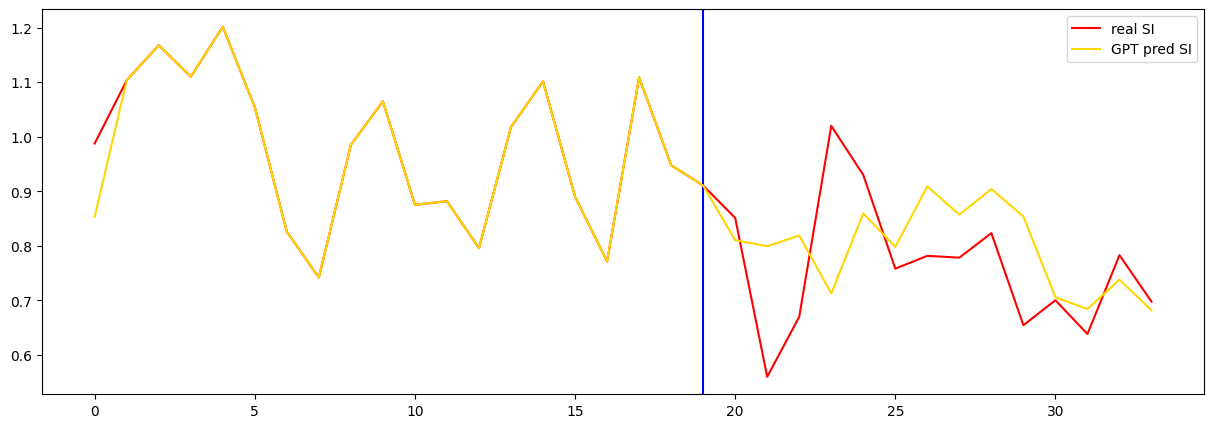

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 4


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  14.556594848632812
seq length of pred =  30
500 train loss =  14.494948387145996
seq length of pred =  30
1000 train loss =  14.546731948852539
seq length of pred =  30
1500 train loss =  15.134509086608887
seq length of pred =  30
2000 train loss =  13.794829368591309
seq length of pred =  30
2500 train loss =  13.822672843933105
seq length of pred =  30


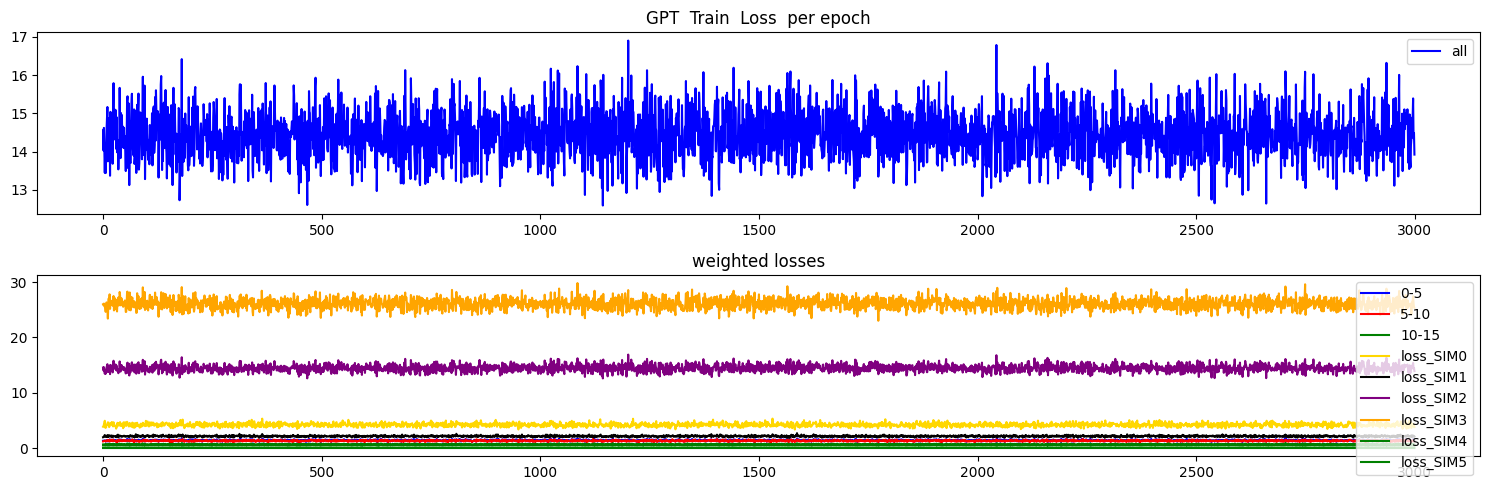

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.041767846792936325
Test MSE Loss - SI only 0-5:  0.014459277503192425
Test MSE Loss - SI only 5-10:  0.019851792603731155
Test MSE Loss - SI only 10-15:  0.03829693794250488
mae, mse, rmse, mape, mspe, rse, corr
(0.1660795, 0.041767843, 0.20437182, 3.7857833, 48.272884, 1.598821)
Testing R**2 - SI only:  -1.556229344505812
Testing R**2 - SI only:  -1.556229344505812
Testing R**2 - All features:  0.9947137460856825
Testing R**2 - (f2) - SI full:  -2.376015158568116


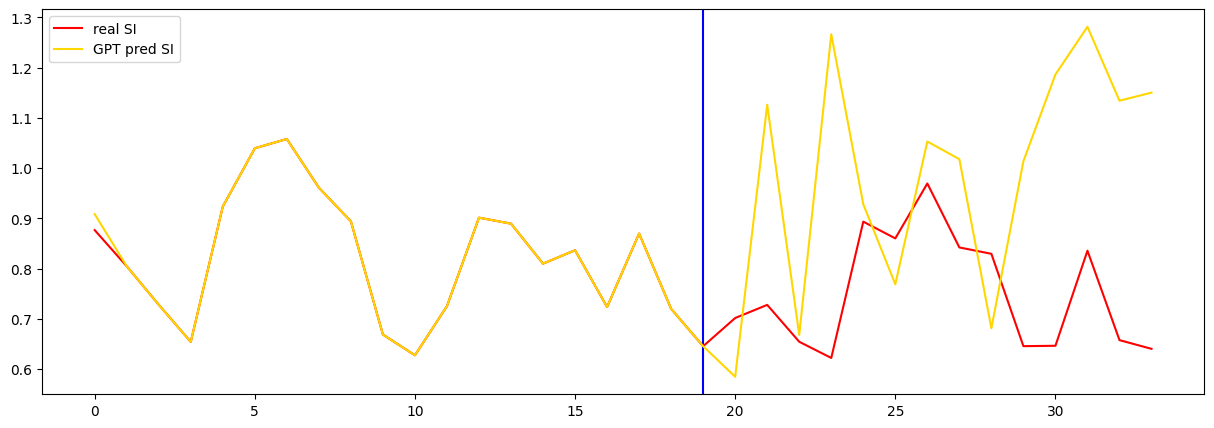

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  10.904850959777832
seq length of pred =  30
500 train loss =  9.969644546508789
seq length of pred =  30
1000 train loss =  11.525059700012207
seq length of pred =  30
1500 train loss =  9.870431900024414
seq length of pred =  30
2000 train loss =  11.919840812683105
seq length of pred =  30
2500 train loss =  10.739052772521973
seq length of pred =  30


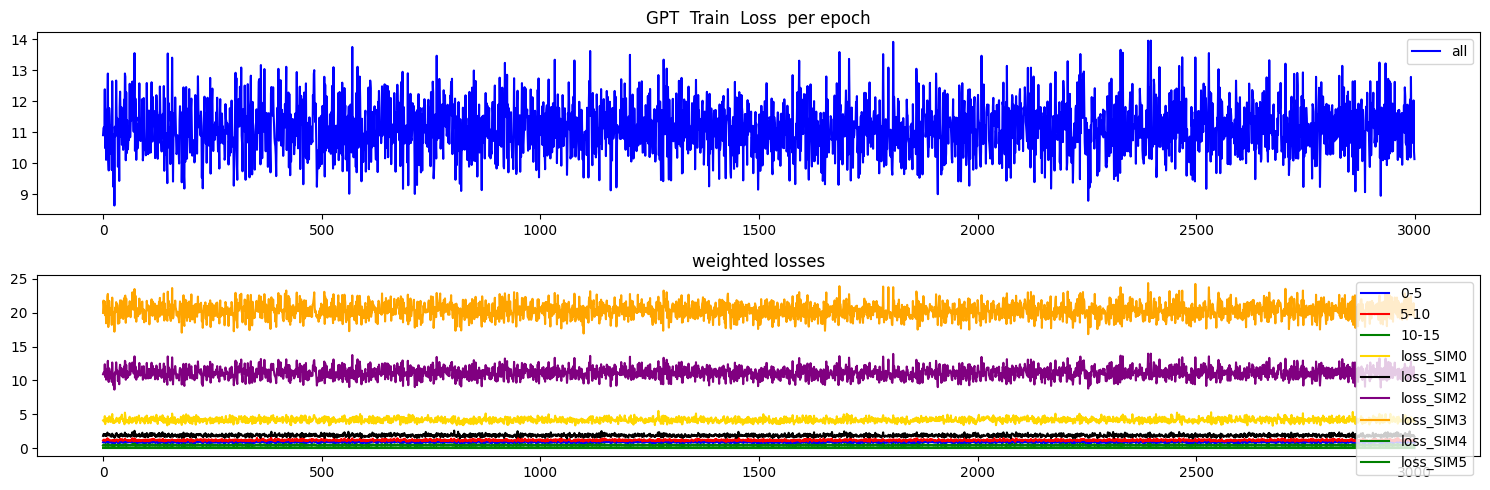

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.03722050413489342
Test MSE Loss - SI only 0-5:  0.014459277503192425
Test MSE Loss - SI only 5-10:  0.019851792603731155
Test MSE Loss - SI only 10-15:  0.03829693794250488
mae, mse, rmse, mape, mspe, rse, corr
(0.1648989, 0.037220504, 0.19292617, 3.8892593, 69.822975, 1.5092806)
Testing R**2 - SI only:  -1.2779280093230554
Testing R**2 - SI only:  -1.2779280093230554
Testing R**2 - All features:  0.9931860290045628
Testing R**2 - (f2) - SI full:  -2.497853434795116


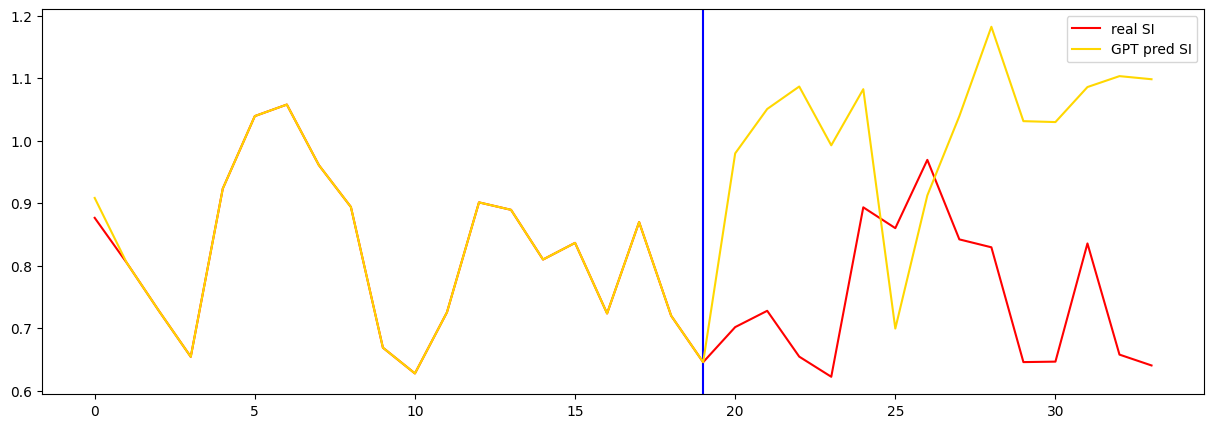

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  11.63513469696045
seq length of pred =  30
500 train loss =  10.446556091308594
seq length of pred =  30
1000 train loss =  11.071386337280273
seq length of pred =  30
1500 train loss =  10.248793601989746
seq length of pred =  30
2000 train loss =  12.44955062866211
seq length of pred =  30
2500 train loss =  12.598407745361328
seq length of pred =  30


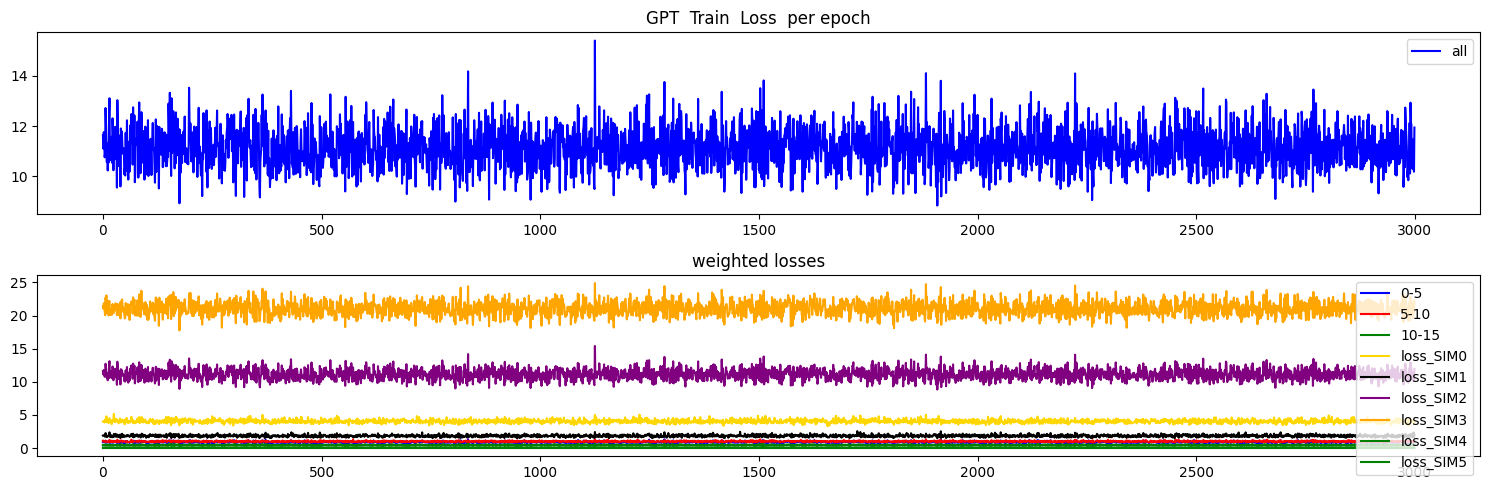

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.028276221826672554
Test MSE Loss - SI only 0-5:  0.014459280297160149
Test MSE Loss - SI only 5-10:  0.019851792603731155
Test MSE Loss - SI only 10-15:  0.03829693794250488
mae, mse, rmse, mape, mspe, rse, corr
(0.14253333, 0.028276224, 0.16815536, 4.4923863, 160.24448, 1.3154961)
Testing R**2 - SI only:  -0.7305301549357106
Testing R**2 - SI only:  -0.7305301549357106
Testing R**2 - All features:  0.9856567901863624
Testing R**2 - (f2) - SI full:  -1.0362709525533345


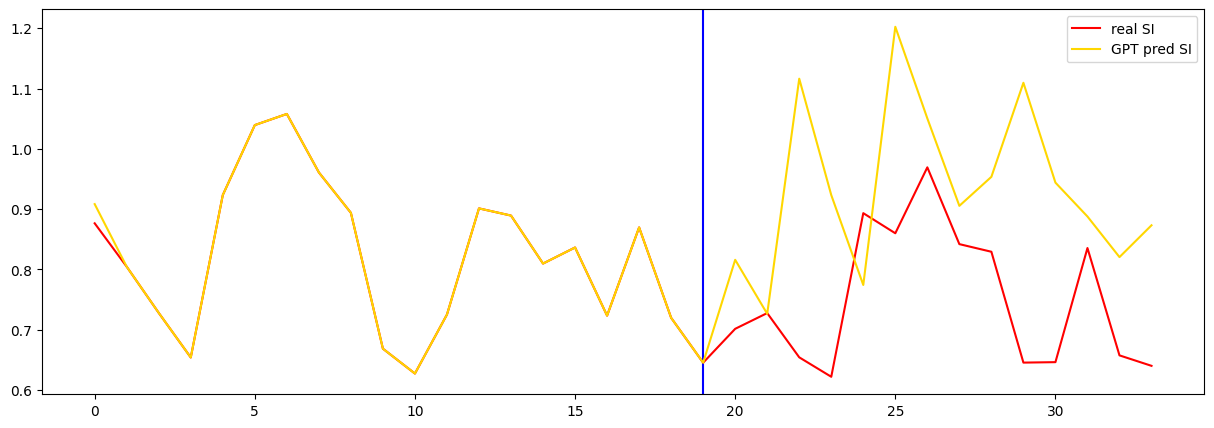

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  14.773299217224121
seq length of pred =  30
500 train loss =  13.408644676208496
seq length of pred =  30
1000 train loss =  14.983572959899902
seq length of pred =  30
1500 train loss =  14.064868927001953
seq length of pred =  30
2000 train loss =  15.859580993652344
seq length of pred =  30
2500 train loss =  14.845100402832031
seq length of pred =  30


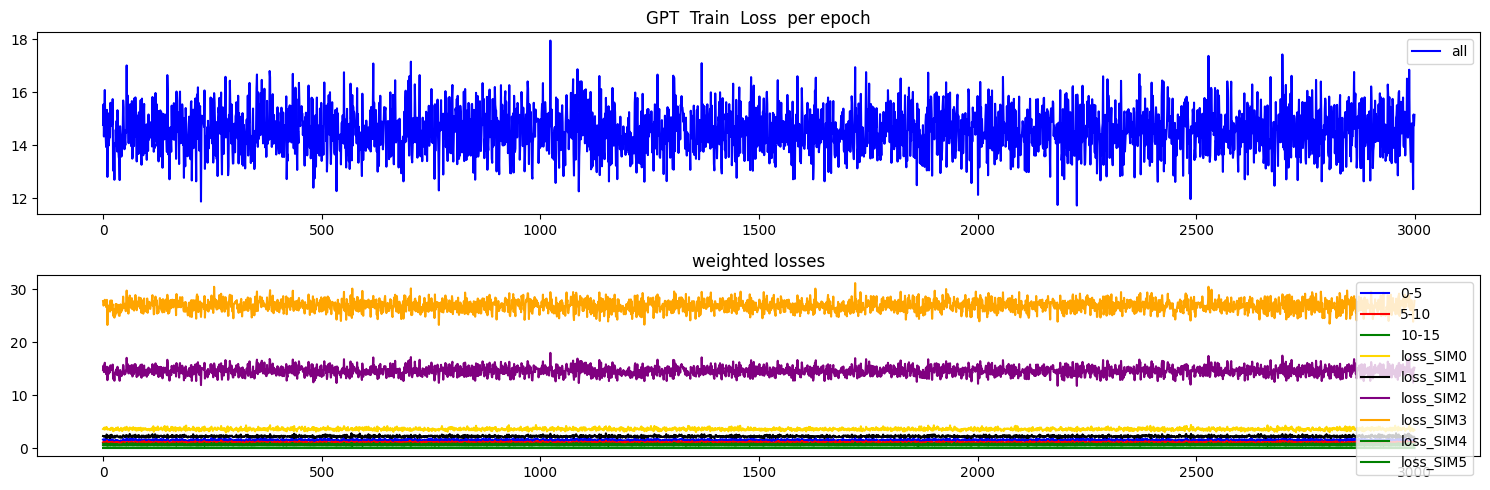

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.030106976628303528
Test MSE Loss - SI only 0-5:  0.014459279365837574
Test MSE Loss - SI only 5-10:  0.019851792603731155
Test MSE Loss - SI only 10-15:  0.03829693794250488
mae, mse, rmse, mape, mspe, rse, corr
(0.13557398, 0.030106978, 0.17351362, 3.1728761, 56.289948, 1.3574144)
Testing R**2 - SI only:  -0.8425739142008191
Testing R**2 - SI only:  -0.8425739142008191
Testing R**2 - All features:  0.989351521255402
Testing R**2 - (f2) - SI full:  -0.7264404945114609


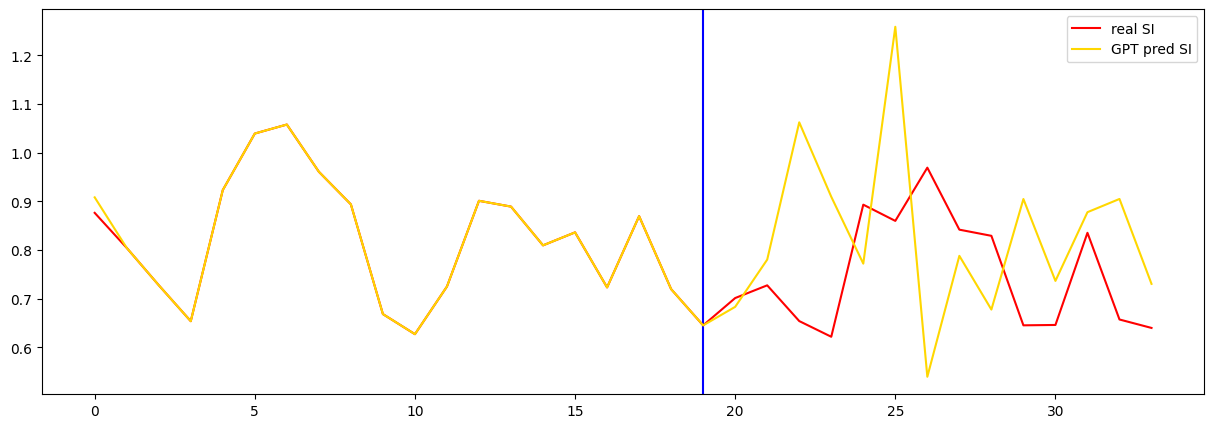

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 5


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  12.782140731811523
seq length of pred =  30
500 train loss =  13.674617767333984
seq length of pred =  30
1000 train loss =  14.362878799438477
seq length of pred =  30
1500 train loss =  13.923013687133789
seq length of pred =  30
2000 train loss =  13.134469032287598
seq length of pred =  30
2500 train loss =  13.300808906555176
seq length of pred =  30


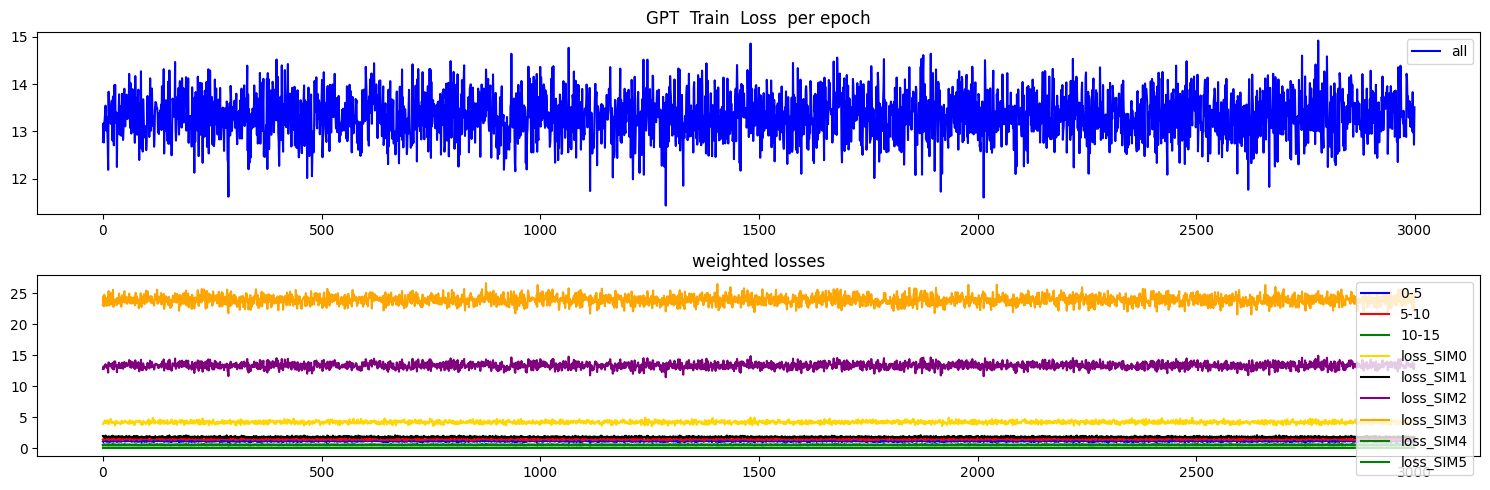

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.09763588756322861
Test MSE Loss - SI only 0-5:  0.13545556366443634
Test MSE Loss - SI only 5-10:  0.19495472311973572
Test MSE Loss - SI only 10-15:  0.2113277167081833
mae, mse, rmse, mape, mspe, rse, corr
(0.24084105, 0.09763589, 0.31246743, 6.72353, 589.49567, 1.4084113)
Testing R**2 - SI only:  -0.9836222918399289
Testing R**2 - SI only:  -0.9836222918399289
Testing R**2 - All features:  0.9910266275143615
Testing R**2 - (f2) - SI full:  0.0136736038861488


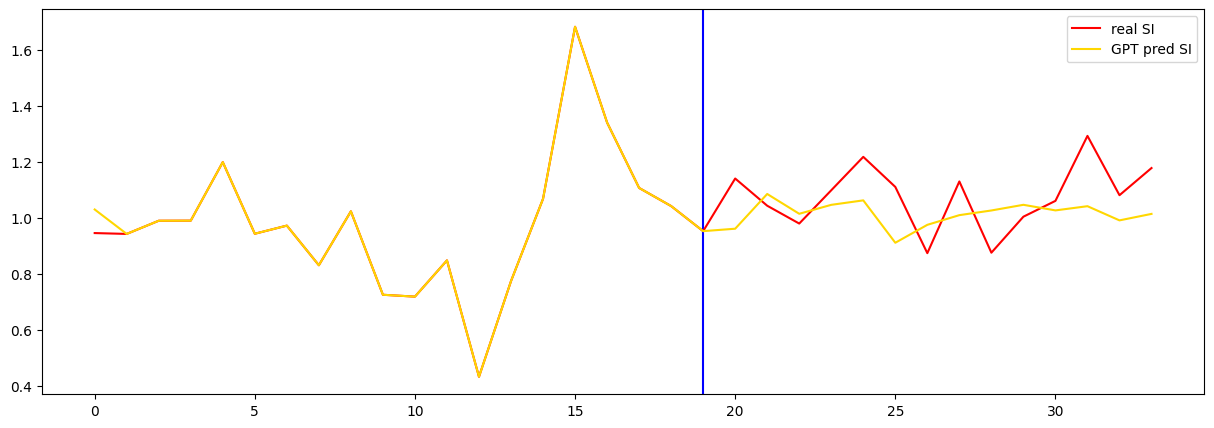

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  18.30517578125
seq length of pred =  30
500 train loss =  16.512081146240234
seq length of pred =  30
1000 train loss =  18.389965057373047
seq length of pred =  30
1500 train loss =  18.660978317260742
seq length of pred =  30
2000 train loss =  17.59526824951172
seq length of pred =  30
2500 train loss =  18.10263442993164
seq length of pred =  30


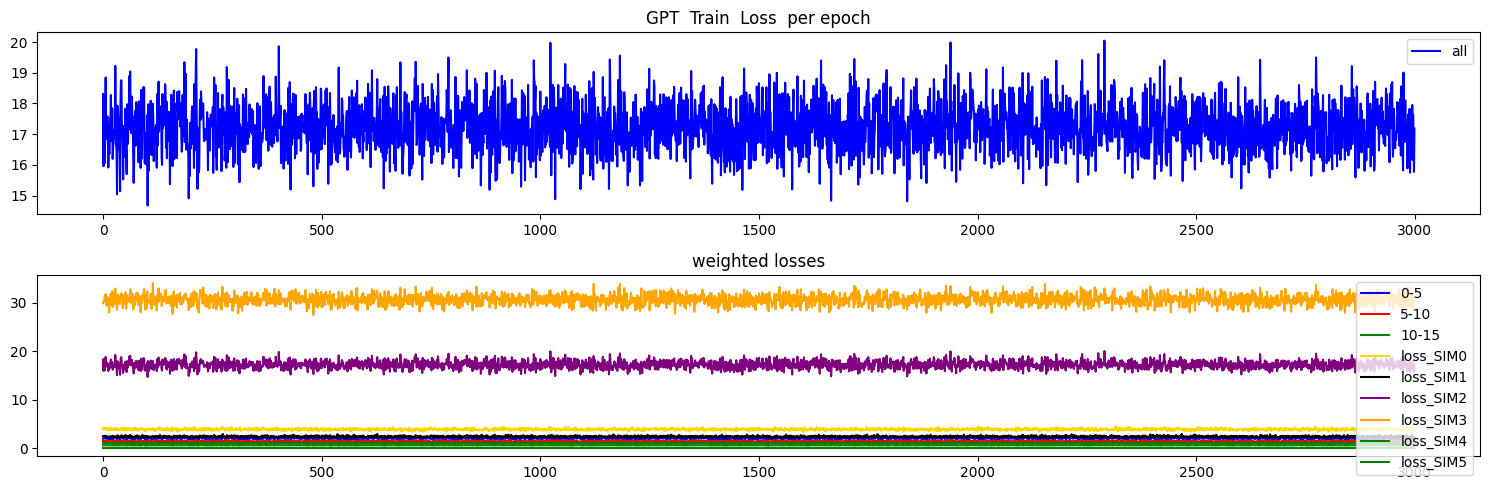

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10363002866506577
Test MSE Loss - SI only 0-5:  0.13545557856559753
Test MSE Loss - SI only 5-10:  0.19495472311973572
Test MSE Loss - SI only 10-15:  0.2113277167081833
mae, mse, rmse, mape, mspe, rse, corr
(0.2454029, 0.10363003, 0.3219162, 6.6889663, 589.4568, 1.4510005)
Testing R**2 - SI only:  -1.105402461047745
Testing R**2 - SI only:  -1.105402461047745
Testing R**2 - All features:  0.9911736735600669
Testing R**2 - (f2) - SI full:  -0.0783520036565497


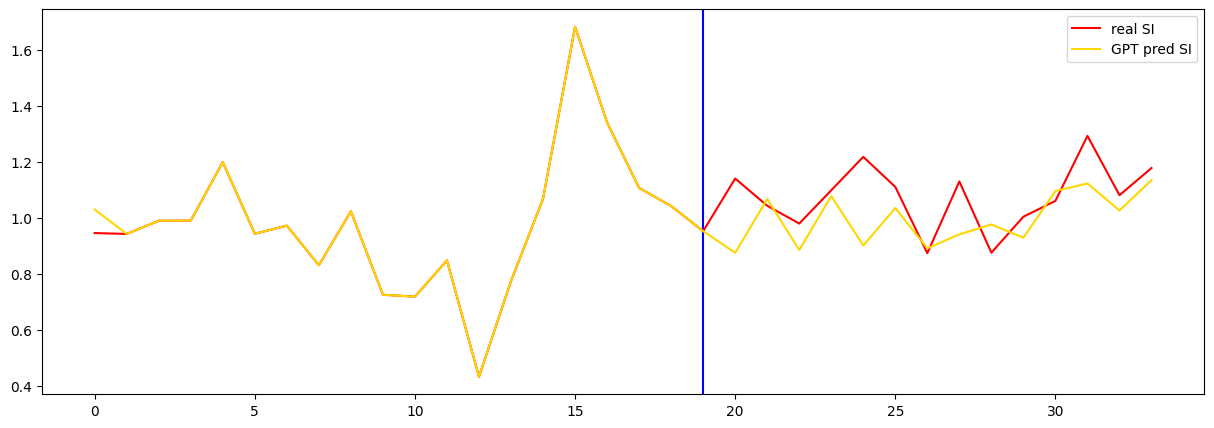

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  15.908883094787598
seq length of pred =  30
500 train loss =  16.789155960083008
seq length of pred =  30
1000 train loss =  16.735118865966797
seq length of pred =  30
1500 train loss =  15.698234558105469
seq length of pred =  30
2000 train loss =  15.162186622619629
seq length of pred =  30
2500 train loss =  16.469161987304688
seq length of pred =  30


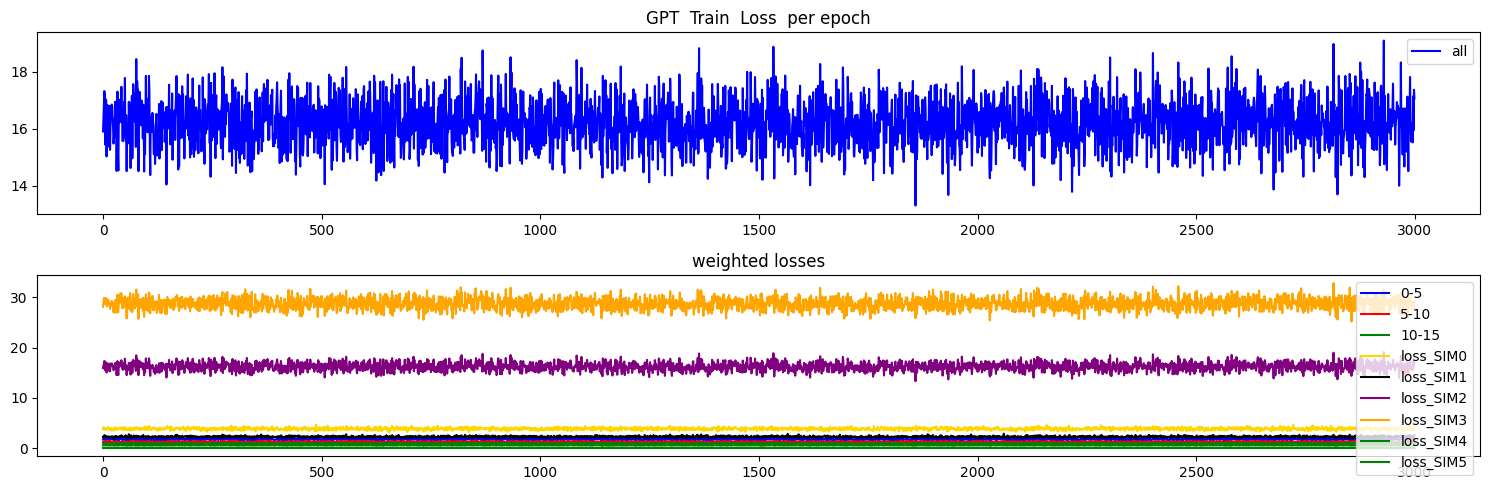

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10136531293392181
Test MSE Loss - SI only 0-5:  0.13545556366443634
Test MSE Loss - SI only 5-10:  0.19495472311973572
Test MSE Loss - SI only 10-15:  0.2113277167081833
mae, mse, rmse, mape, mspe, rse, corr
(0.24354683, 0.101365305, 0.3183792, 6.7278123, 589.6475, 1.435058)
Testing R**2 - SI only:  -1.059391217529476
Testing R**2 - SI only:  -1.059391217529476
Testing R**2 - All features:  0.9896789684975174
Testing R**2 - (f2) - SI full:  -0.17617684237342113


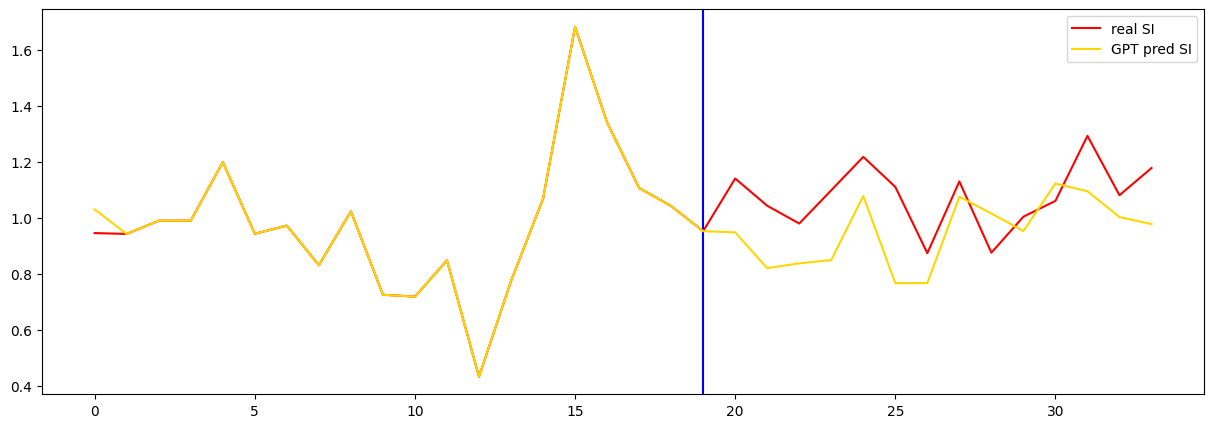

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  16.943695068359375
seq length of pred =  30
500 train loss =  15.845970153808594
seq length of pred =  30
1000 train loss =  16.856494903564453
seq length of pred =  30
1500 train loss =  15.269798278808594
seq length of pred =  30
2000 train loss =  15.98744010925293
seq length of pred =  30
2500 train loss =  15.173888206481934
seq length of pred =  30


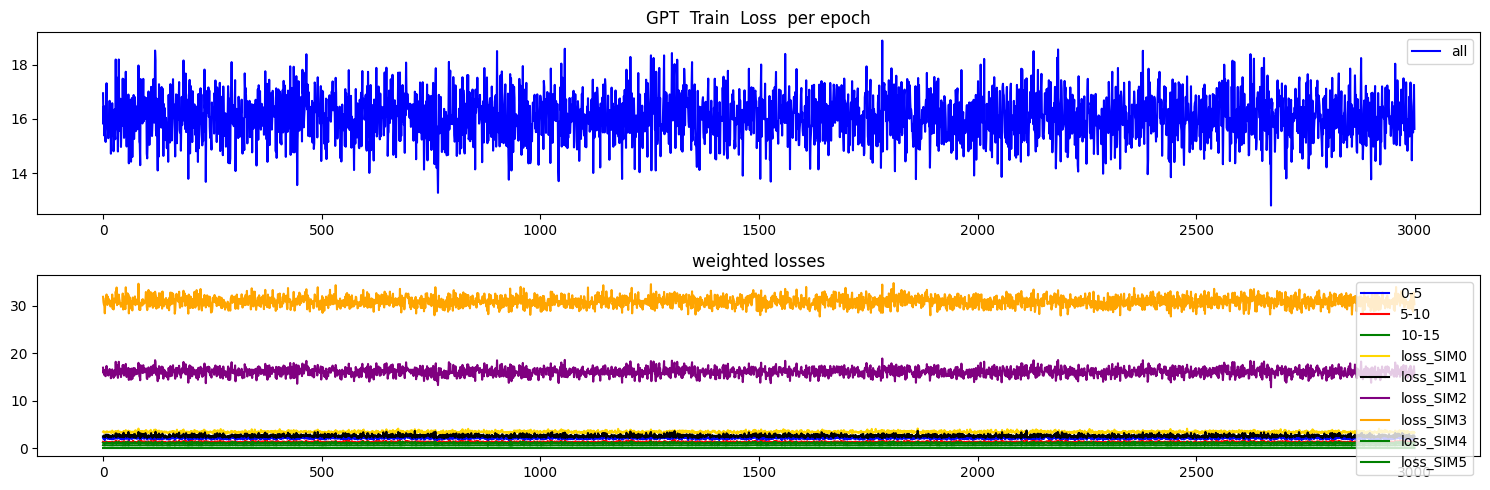

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.10390985757112503
Test MSE Loss - SI only 0-5:  0.13545556366443634
Test MSE Loss - SI only 5-10:  0.19495472311973572
Test MSE Loss - SI only 10-15:  0.2113277167081833
mae, mse, rmse, mape, mspe, rse, corr
(0.2512696, 0.10390986, 0.32235053, 6.7736015, 589.64514, 1.4529582)
Testing R**2 - SI only:  -1.1110875435195813
Testing R**2 - SI only:  -1.1110875435195813
Testing R**2 - All features:  0.99013054735288
Testing R**2 - (f2) - SI full:  -0.3036098909441558


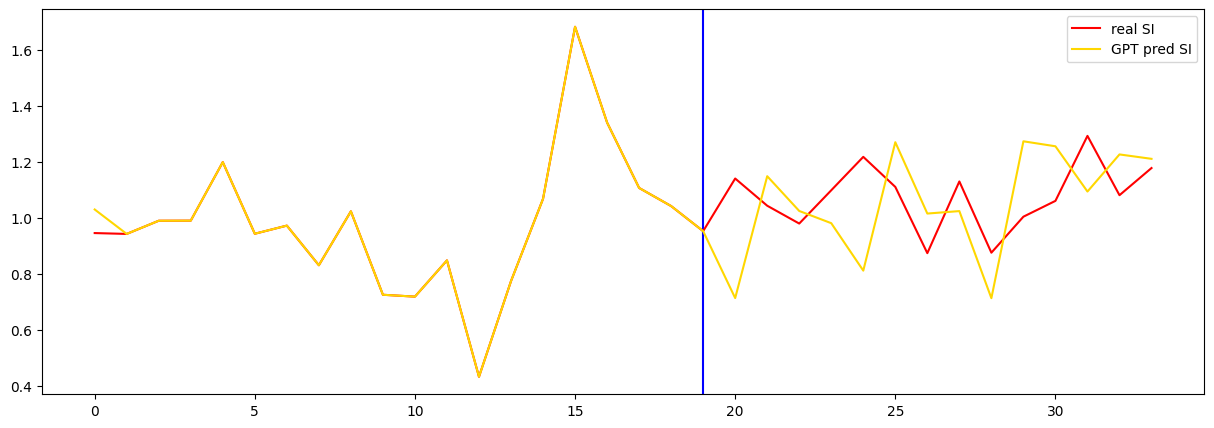

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  16.05107879638672
seq length of pred =  30
500 train loss =  17.1021671295166
seq length of pred =  30
1000 train loss =  15.559974670410156
seq length of pred =  30
1500 train loss =  16.451902389526367
seq length of pred =  30
2000 train loss =  15.333965301513672
seq length of pred =  30
2500 train loss =  14.901639938354492
seq length of pred =  30


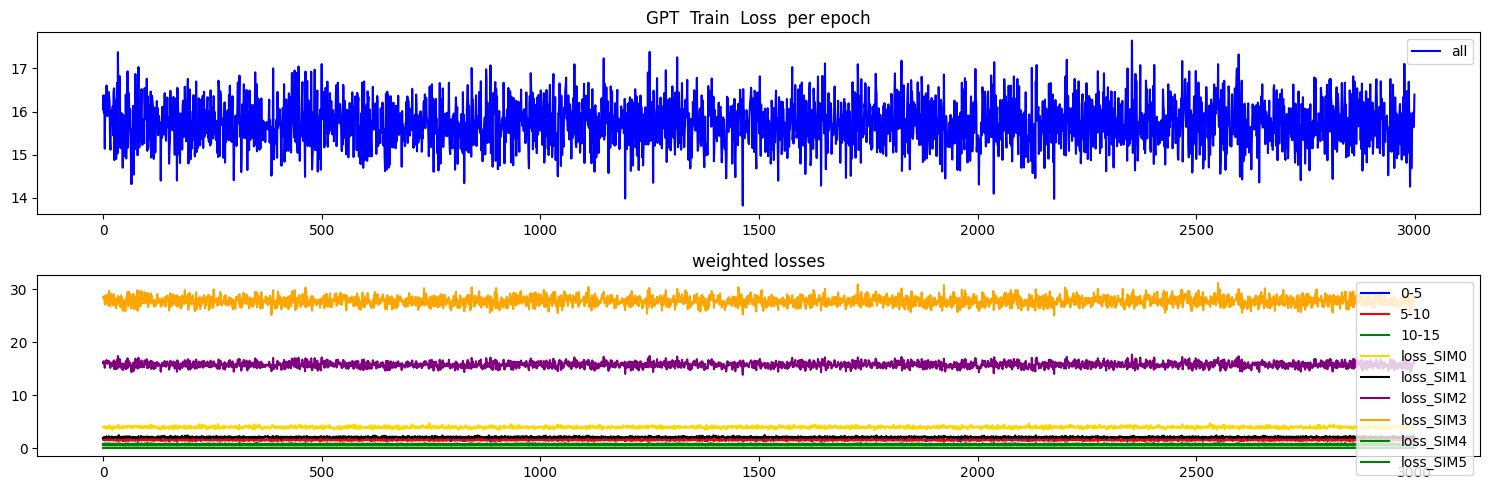

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.03830898925662041
Test MSE Loss - SI only 0-5:  0.009834928438067436
Test MSE Loss - SI only 5-10:  0.06209190934896469
Test MSE Loss - SI only 10-15:  0.011047786101698875
mae, mse, rmse, mape, mspe, rse, corr
(0.15212967, 0.03830899, 0.19572683, 10.695817, 3751.8105, 1.153129)
Testing R**2 - SI only:  -0.3297063702185816
Testing R**2 - SI only:  -0.3297063702185816
Testing R**2 - All features:  0.9911814018660376
Testing R**2 - (f2) - SI full:  -0.5462574913971541


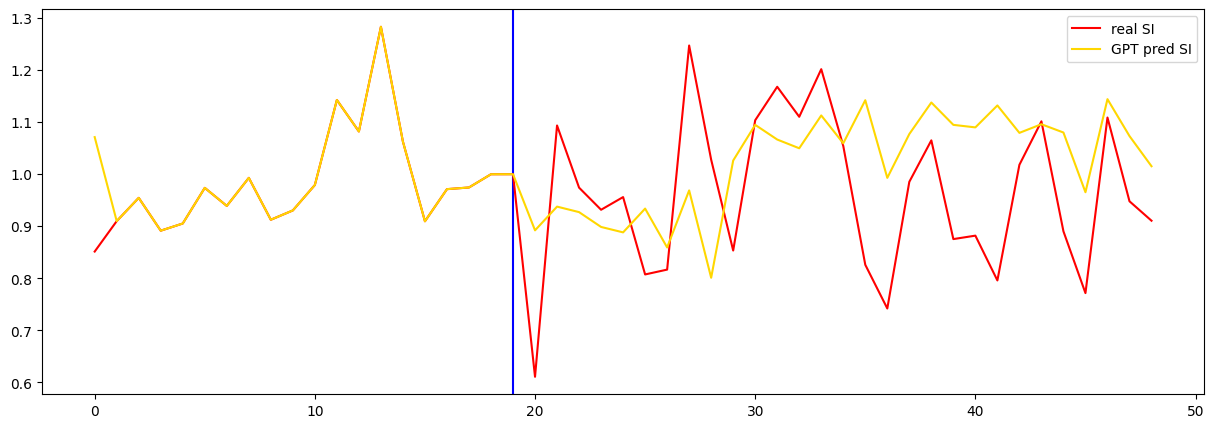

In [35]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  16.124290466308594
seq length of pred =  30
500 train loss =  17.723344802856445
seq length of pred =  30
1000 train loss =  19.532848358154297
seq length of pred =  30
1500 train loss =  20.147802352905273
seq length of pred =  30
2000 train loss =  15.059605598449707
seq length of pred =  30
2500 train loss =  17.43588638305664
seq length of pred =  30


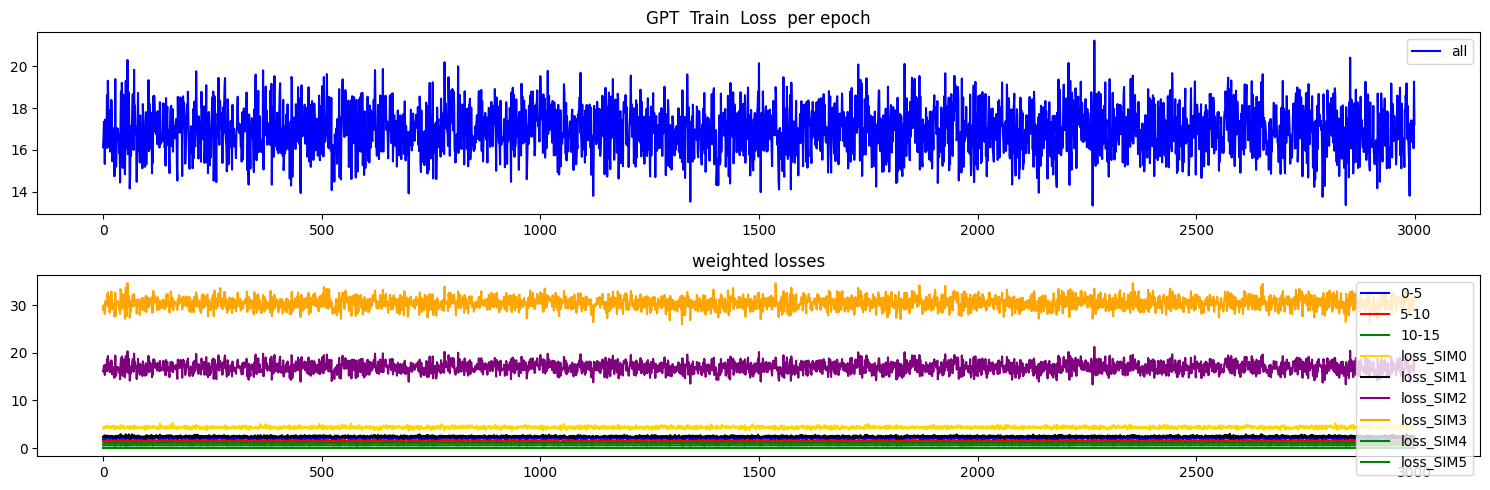

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.035720668733119965
Test MSE Loss - SI only 0-5:  0.08809621632099152
Test MSE Loss - SI only 5-10:  0.006464369595050812
Test MSE Loss - SI only 10-15:  0.06259326636791229
mae, mse, rmse, mape, mspe, rse, corr
(0.13796793, 0.03572067, 0.18899912, 3.3920295, 77.52921, 1.4686369)
Testing R**2 - SI only:  -1.1568942353841876
Testing R**2 - SI only:  -1.1568942353841876
Testing R**2 - All features:  0.9956845632660726
Testing R**2 - (f2) - SI full:  -0.9431725688650929


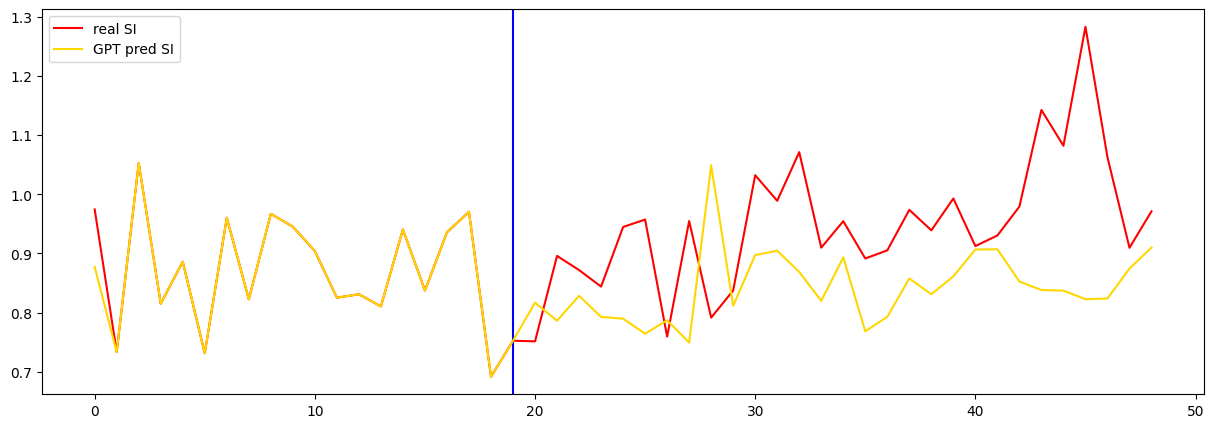

In [36]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  12.922869682312012
seq length of pred =  30
500 train loss =  12.563273429870605
seq length of pred =  30
1000 train loss =  12.238224983215332
seq length of pred =  30
1500 train loss =  13.394752502441406
seq length of pred =  30
2000 train loss =  13.201473236083984
seq length of pred =  30
2500 train loss =  12.92508316040039
seq length of pred =  30


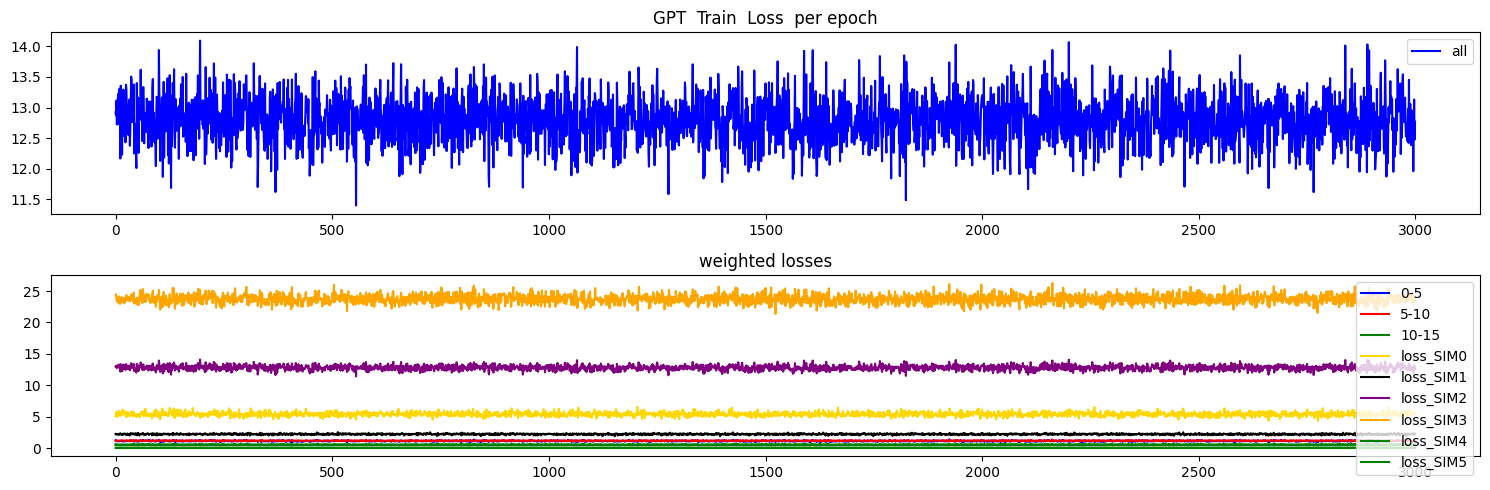

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.04099082574248314
Test MSE Loss - SI only 0-5:  0.06629078090190887
Test MSE Loss - SI only 5-10:  0.03241978585720062
Test MSE Loss - SI only 10-15:  0.03260406106710434
mae, mse, rmse, mape, mspe, rse, corr
(0.14949517, 0.040990815, 0.20246188, 3.699679, 197.82994, 1.5156606)
Testing R**2 - SI only:  -1.2972272326556382
Testing R**2 - SI only:  -1.2972272326556382
Testing R**2 - All features:  0.9421680647753645
Testing R**2 - (f2) - SI full:  -0.5766326109297171


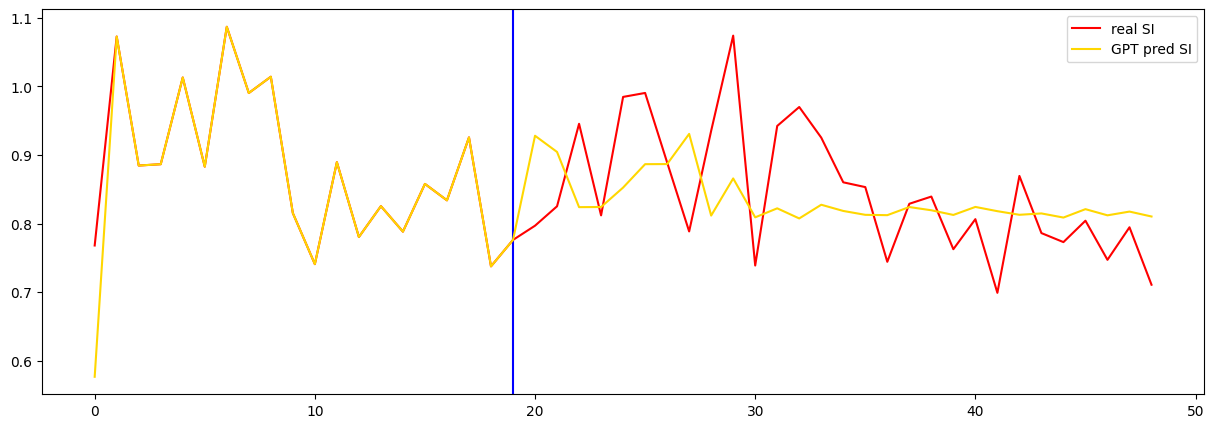

In [37]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  16.161476135253906
seq length of pred =  30
500 train loss =  15.785097122192383
seq length of pred =  30
1000 train loss =  16.512325286865234
seq length of pred =  30
1500 train loss =  14.692436218261719
seq length of pred =  30
2000 train loss =  15.10690975189209
seq length of pred =  30
2500 train loss =  15.202645301818848
seq length of pred =  30


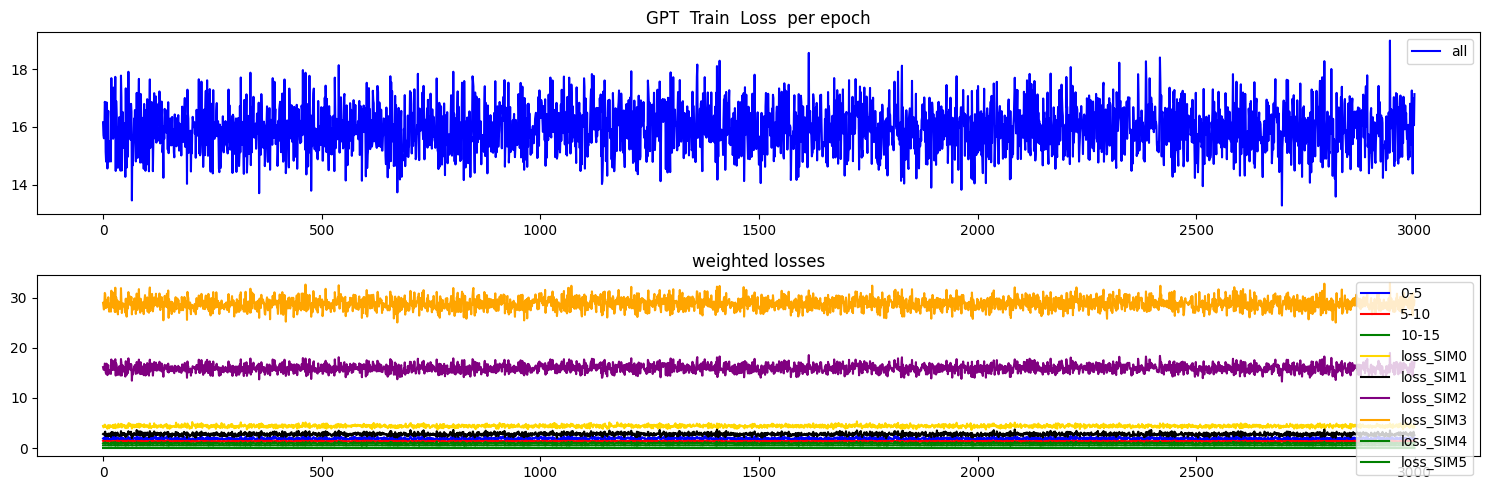

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.04268675297498703
Test MSE Loss - SI only 0-5:  0.019248368218541145
Test MSE Loss - SI only 5-10:  0.02368183620274067
Test MSE Loss - SI only 10-15:  0.08301205933094025
mae, mse, rmse, mape, mspe, rse, corr
(0.16981876, 0.04268676, 0.20660774, 3.5210483, 37.38751, 1.5215315)
Testing R**2 - SI only:  -1.3150579647380503
Testing R**2 - SI only:  -1.3150579647380503
Testing R**2 - All features:  0.9887661512000002
Testing R**2 - (f2) - SI full:  -0.040719408278858005


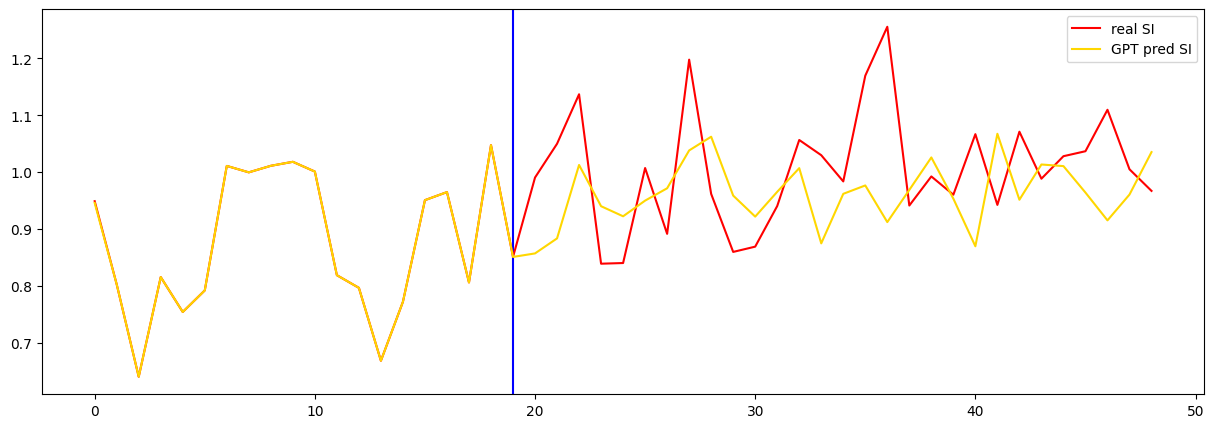

In [38]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  12.227066040039062
seq length of pred =  30
500 train loss =  11.742754936218262
seq length of pred =  30
1000 train loss =  11.996927261352539
seq length of pred =  30
1500 train loss =  11.858892440795898
seq length of pred =  30
2000 train loss =  11.414973258972168
seq length of pred =  30
2500 train loss =  12.569429397583008
seq length of pred =  30


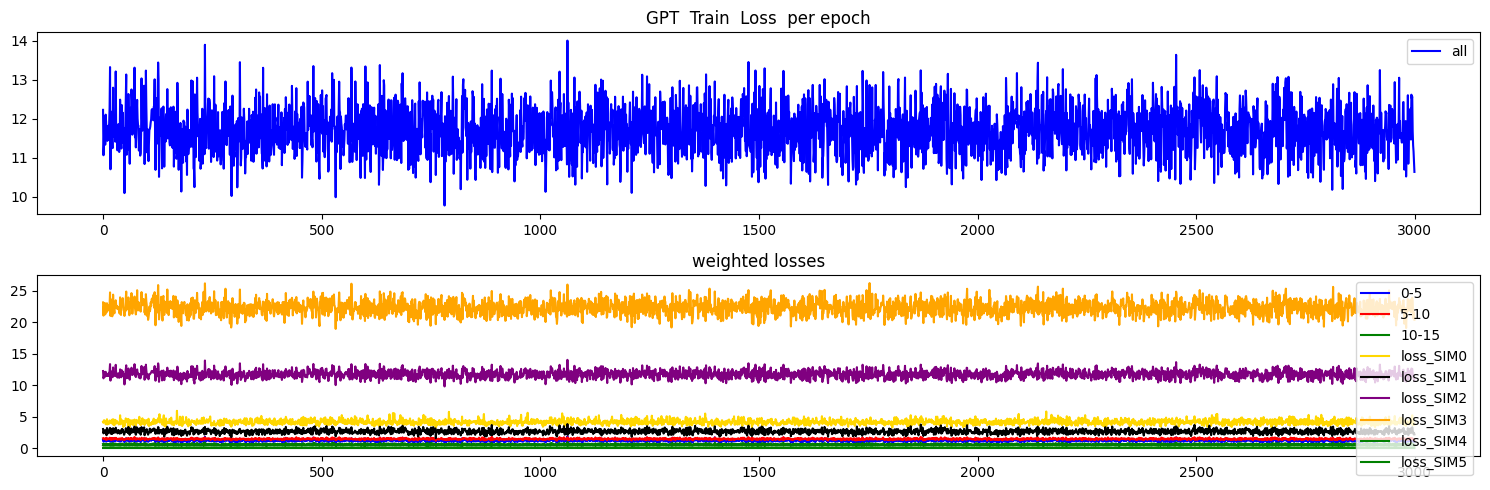

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.06590586155653
Test MSE Loss - SI only 0-5:  0.0017086232546716928
Test MSE Loss - SI only 5-10:  0.0260626170784235
Test MSE Loss - SI only 10-15:  0.021424707025289536
mae, mse, rmse, mape, mspe, rse, corr
(0.1595268, 0.06590586, 0.25672138, 3.375937, 58.48698, 1.0580336)
Testing R**2 - SI only:  -0.11943491505568549
Testing R**2 - SI only:  -0.11943491505568549
Testing R**2 - All features:  0.5777092232672646
Testing R**2 - (f2) - SI full:  0.016069171788613668


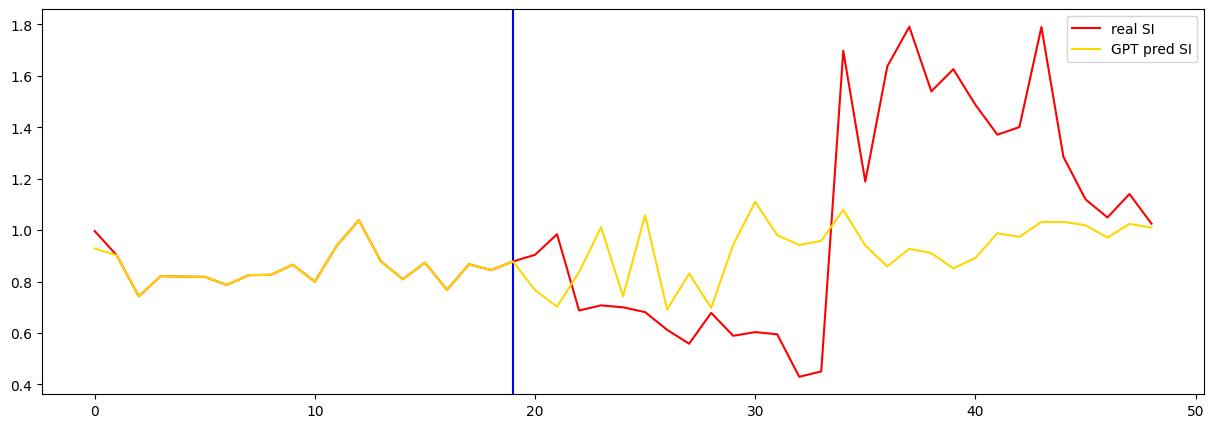

In [39]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


0 train loss =  12.714447021484375
seq length of pred =  30
500 train loss =  12.903302192687988
seq length of pred =  30
1000 train loss =  12.613698959350586
seq length of pred =  30
1500 train loss =  13.136422157287598
seq length of pred =  30
2000 train loss =  13.844510078430176
seq length of pred =  30
2500 train loss =  13.15609073638916
seq length of pred =  30


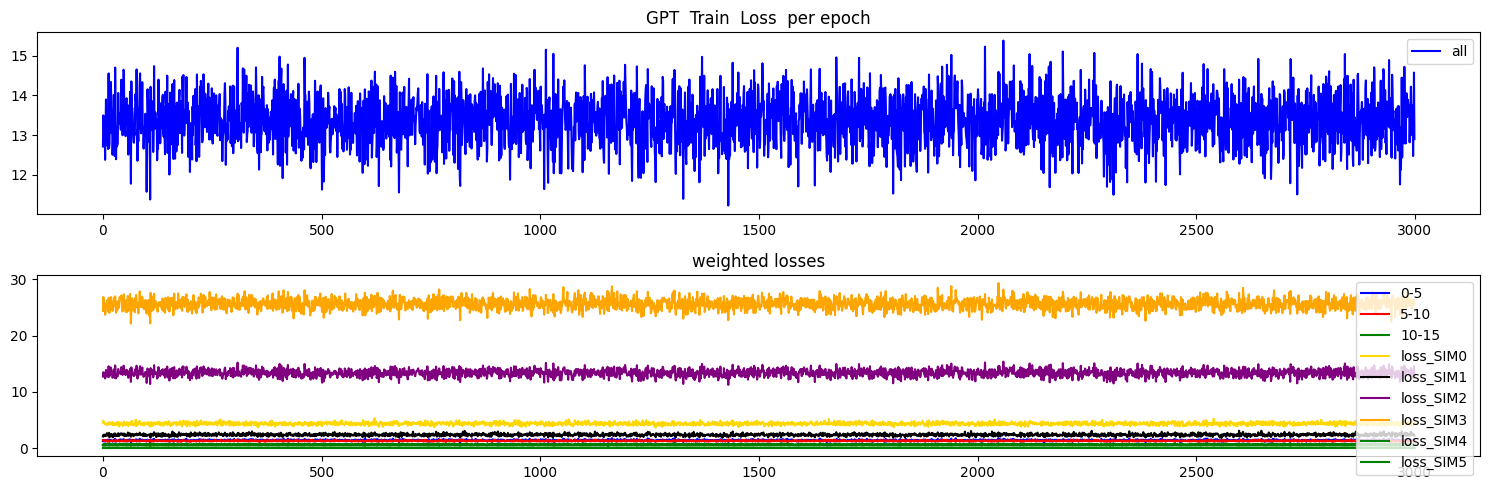

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.04715321958065033
Test MSE Loss - SI only 0-5:  0.13390900194644928
Test MSE Loss - SI only 5-10:  0.011334029957652092
Test MSE Loss - SI only 10-15:  0.07164943218231201
mae, mse, rmse, mape, mspe, rse, corr
(0.17332272, 0.04715322, 0.21714792, 11.445082, 1706.2037, 1.4746681)
Testing R**2 - SI only:  -1.1746459329324428
Testing R**2 - SI only:  -1.1746459329324428
Testing R**2 - All features:  0.9863329890022771
Testing R**2 - (f2) - SI full:  -2.354433970773112


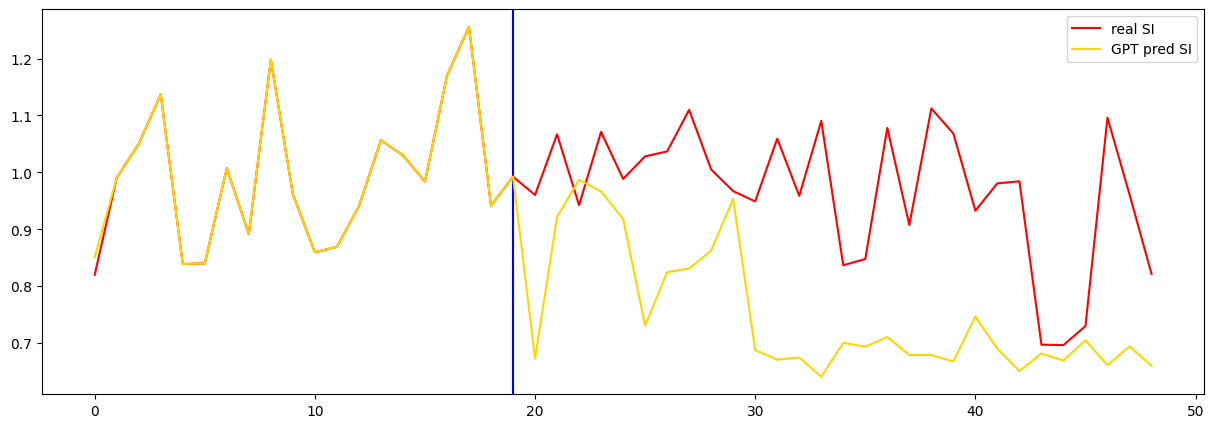

In [40]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


0 train loss =  12.950811386108398
seq length of pred =  30
500 train loss =  13.54910659790039
seq length of pred =  30
1000 train loss =  13.366888999938965
seq length of pred =  30
1500 train loss =  14.457781791687012
seq length of pred =  30
2000 train loss =  13.874603271484375
seq length of pred =  30
2500 train loss =  13.979598999023438
seq length of pred =  30


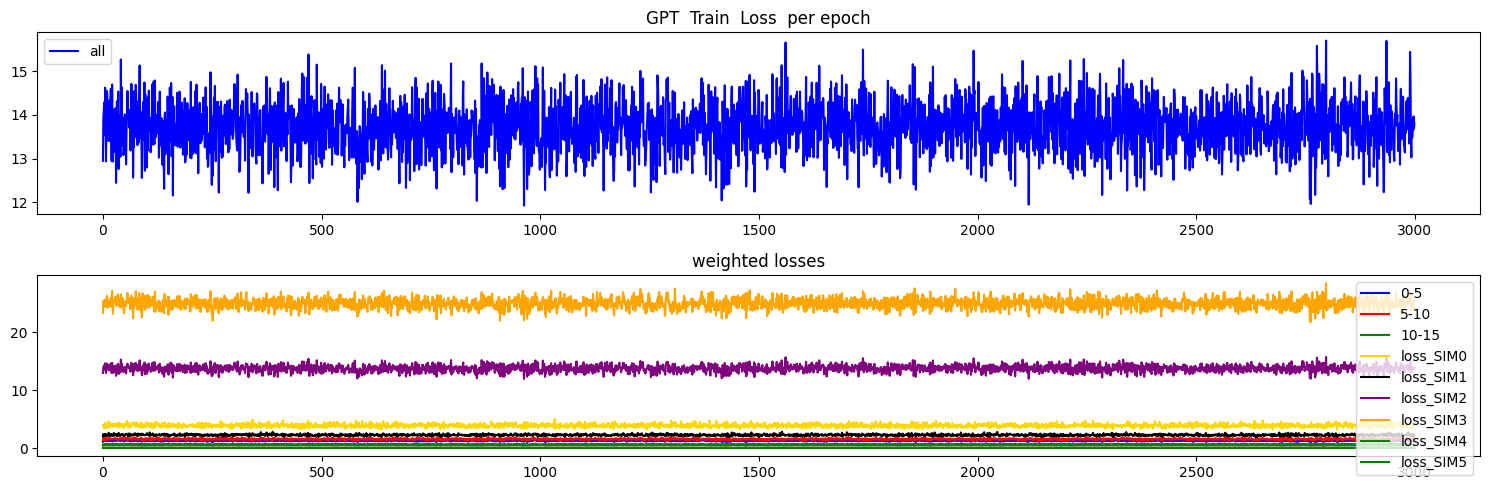

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.11690834909677505
Test MSE Loss - SI only 0-5:  0.1262786090373993
Test MSE Loss - SI only 5-10:  0.16294224560260773
Test MSE Loss - SI only 10-15:  0.08330092579126358
mae, mse, rmse, mape, mspe, rse, corr
(0.25570762, 0.11690835, 0.34191862, 1.8506385, 11.596847, 1.2262322)
Testing R**2 - SI only:  -0.5036450668718104
Testing R**2 - SI only:  -0.5036450668718104
Testing R**2 - All features:  0.9651931748493678
Testing R**2 - (f2) - SI full:  -2.140549006201913


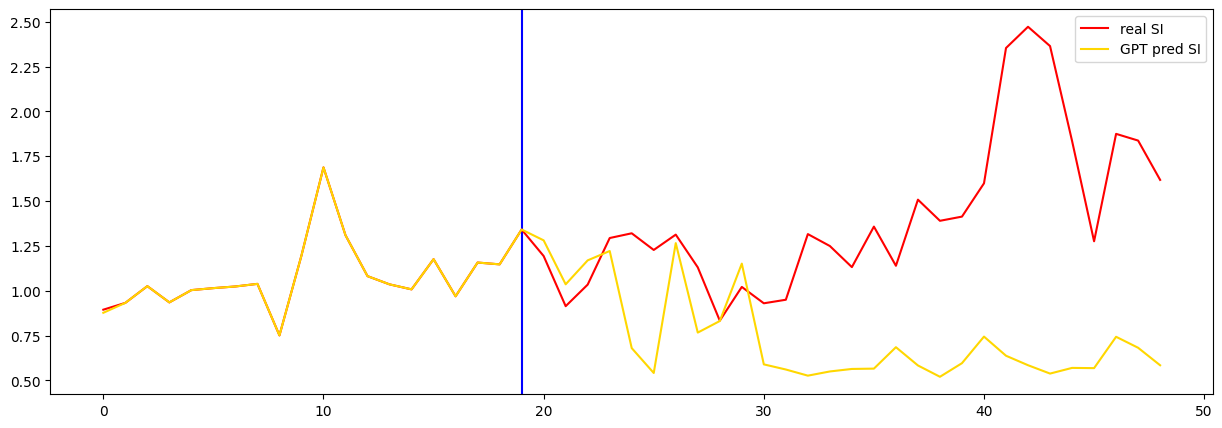

In [41]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [42]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [43]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
